In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
from sklearn.model_selection import train_test_split
sns.set()
pd.set_option('display.max_columns', None)
pre_trained = True

plt.rcParams['figure.figsize'] = [15, 8]

# Feature Analysis

Analyses de features du problème posé.

## Loading the data


In [2]:
train_data = pd.read_csv("data/xtrain_challenge.csv")
ytrain=pd.read_csv("data/ytrain_challenge.csv")
test_data = pd.read_csv("data/xtest_challenge.csv")
train_data["Label"] = ytrain

In [3]:
# Columns dr, qs and Sxx are the mains feature
cols_qs = list(train_data.columns)[:13]
cols_qr = list(train_data.columns)[13:26]
cols_S1_11 = list(train_data.columns)[26:37]

In [4]:

def score(y_true, y_pred):
    yvalid_scoreordered = y_true[np.argsort(y_pred)]
    N = np.sum(y_true == 0)
    P = np.sum(y_true == 1)
    FP = 0.0
    TP = 0.0
    val = 0
    for i in range(len(y_true) - 1, -1, -1):        
        if (yvalid_scoreordered[i] == 1):
            TP = TP + 1
        else:
            FP = FP + 1
        if (FP / N > 10**-4):
            FP = FP - 1
            break
    print("For the smallest FPR <= 10^-4 (i.e., ", FP / N, ") TPR = ", TP / P, ".", sep = "")
    return TP/P


In [5]:
train_data.head(10)

,qs1,qs2,qs3,qs4,qs5,qs6,qs7,qs8,qs9,qs10,qs11,qs12,qs13,qr1,qr2,qr3,qr4,qr5,qr6,qr7,qr8,qr9,qr10,qr11,qr12,qr13,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,Label
0,1.0,0.0,0.0,-6.24,-5.27,-1.86,0.63,3.27,0.89,350.98,64.86,0.0,1.00,1.0,0.0,0.0,-9.44,-12.53,0.84,2.59,1.53,1.03,276.02,58.02,0.0,1.00,2405.94,1981.09,2677.84,2470.44,1579.39,2185.79,2118.77,2580.99,2498.04,3180.58,2718.29,0
1,1.0,0.0,0.0,-0.42,-4.50,-4.31,1.61,1.72,2.76,347.06,28.85,0.0,0.99,1.0,0.0,0.0,-0.35,-18.97,-1.31,1.23,0.84,0.34,263.84,30.50,0.0,1.00,3241.37,2015.24,3987.19,3343.53,2894.69,2947.34,2689.42,3763.51,2544.22,3515.58,3247.49,0
2,1.0,0.0,0.0,33.76,-19.29,2.71,1.73,1.32,1.53,135.94,57.65,1.0,0.01,1.0,0.0,0.0,-12.58,-9.99,-0.15,1.21,0.34,1.60,357.67,51.98,1.0,1.00,2199.22,2549.59,2164.41,2100.69,1294.35,2136.04,1644.05,2308.05,1774.88,3005.79,2507.02,0
3,1.0,0.0,0.0,-2.82,-8.04,3.04,0.94,2.92,0.09,288.07,21.23,0.0,0.94,1.0,0.0,0.0,1.57,-13.22,-2.66,1.18,0.23,0.38,268.44,24.59,0.0,0.19,2390.40,2141.75,2086.02,2154.69,1247.48,1903.36,2232.54,2146.34,2201.53,3315.03,2274.76,0
4,1.0,0.0,0.0,3.56,-10.61,-0.65,0.19,1.04,2.10,166.12,37.36,1.0,0.00,1.0,0.0,0.0,20.03,-15.53,-1.21,1.31,0.23,1.25,172.19,26.14,0.0,1.00,1822.14,2202.60,2150.07,2194.25,1575.43,2345.59,1976.82,1440.78,2061.06,2927.96,2073.16,0
5,1.0,0.0,0.0,3.10,-6.27,-2.70,0.20,1.82,1.16,267.62,34.40,0.0,1.00,1.0,0.0,0.0,-10.03,3.83,-1.81,2.62,0.31,0.08,264.94,35.82,0.0,1.00,1654.88,1759.45,2727.66,2253.47,2091.18,2021.04,1963.33,2436.20,2333.33,3034.30,2359.34,0
6,1.0,0.0,0.0,-5.08,3.91,-0.47,1.45,0.07,2.15,188.00,36.80,0.0,1.00,1.0,0.0,0.0,0.02,1.34,-2.72,1.80,0.12,0.65,231.98,37.27,0.0,0.00,2320.56,1685.26,2307.06,1939.64,1549.16,2148.36,1590.07,2107.89,2273.71,3169.00,2403.95,0
7,1.0,0.0,0.0,1.52,-6.21,1.53,0.91,0.77,0.65,306.03,32.23,0.0,1.00,1.0,0.0,0.0,0.53,1.49,1.30,0.57,0.18,1.07,404.22,24.13,0.0,1.00,2210.33,1968.06,2738.41,2524.63,2313.01,2096.95,2466.05,2148.19,2413.82,3231.56,2895.45,0
8,1.0,0.0,0.0,-0.51,9.75,8.86,1.49,0.31,1.29,375.26,43.40,0.0,1.00,1.0,0.0,0.0,2.91,9.49,-8.28,2.17,1.02,0.07,344.02,46.38,0.0,1.00,2180.16,2385.96,2246.63,2169.35,1783.36,1934.03,2355.90,2034.93,2133.04,3286.98,2282.92,0
9,1.0,0.0,0.0,-7.89,-5.71,-12.80,2.28,0.40,1.50,282.73,40.00,0.0,0.00,1.0,0.0,0.0,11.33,-1.36,5.89,3.80,0.32,0.79,263.39,26.94,0.0,0.00,5428.98,4299.10,6658.78,8224.55,6603.65,6599.55,7133.70,6894.58,7169.84,6608.53,6802.31,1


## Data distribution for each columns

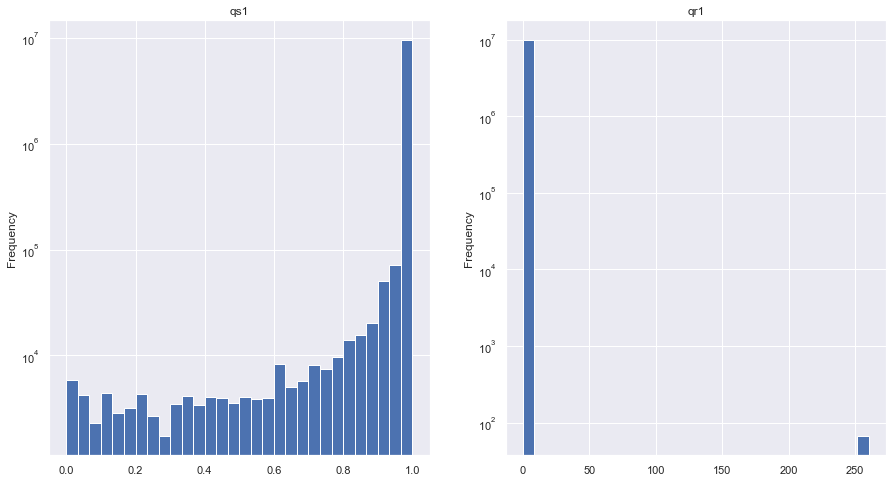

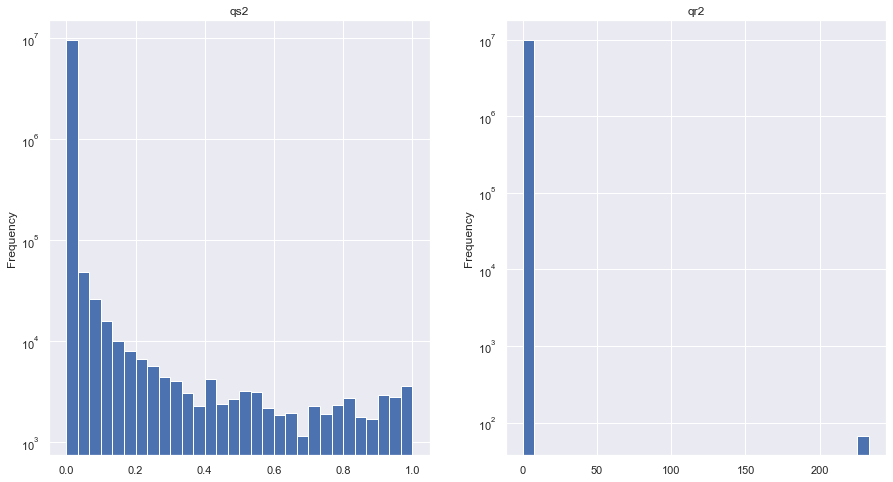

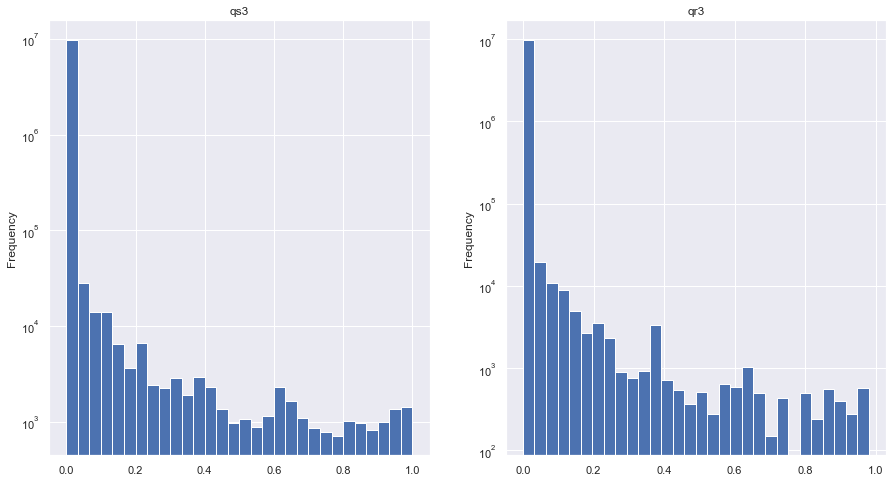

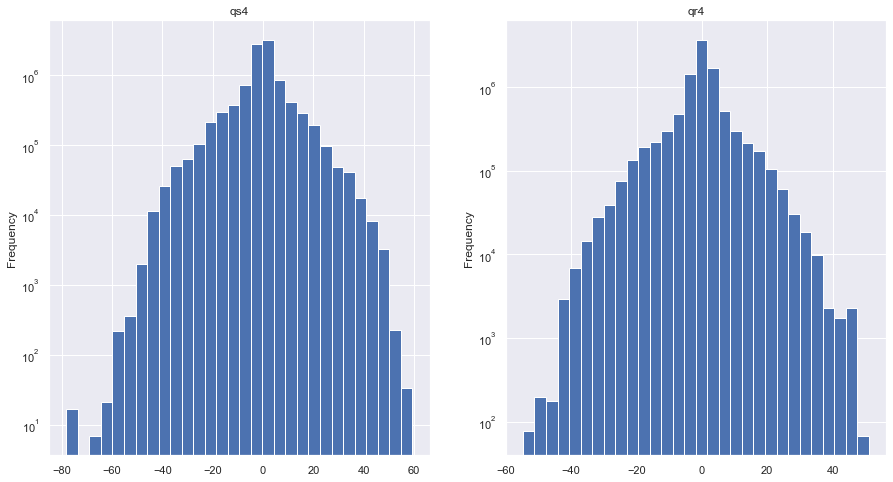

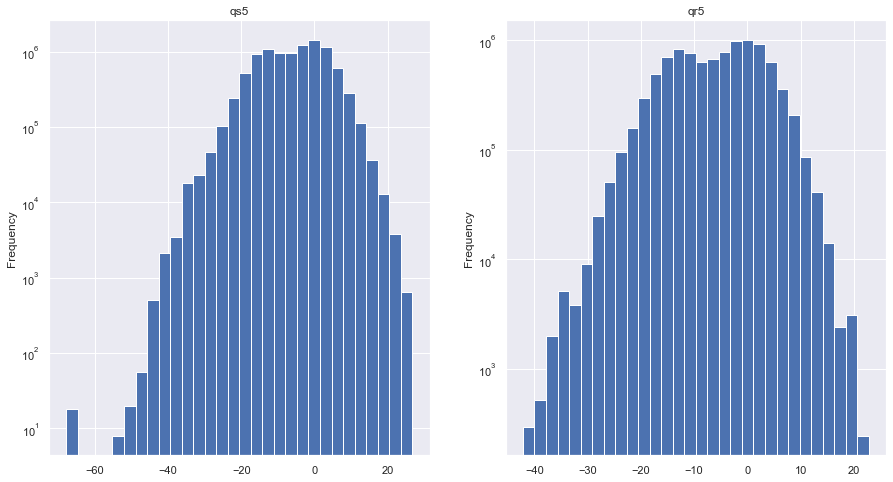

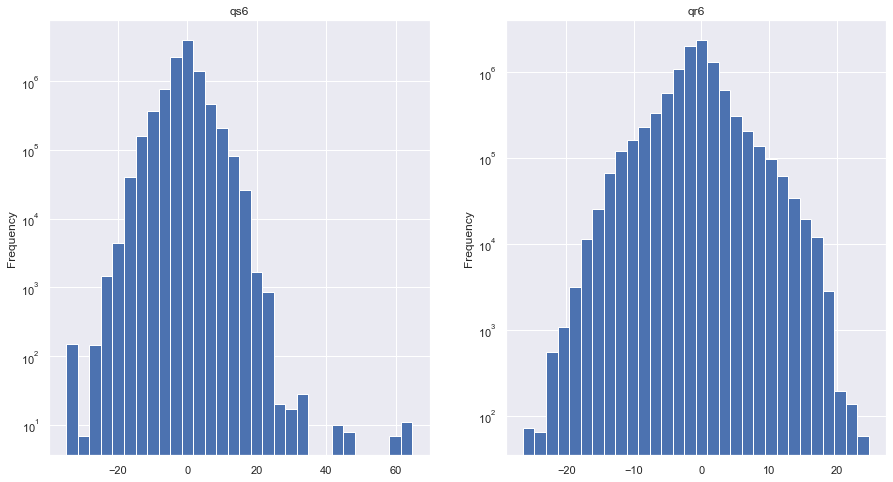

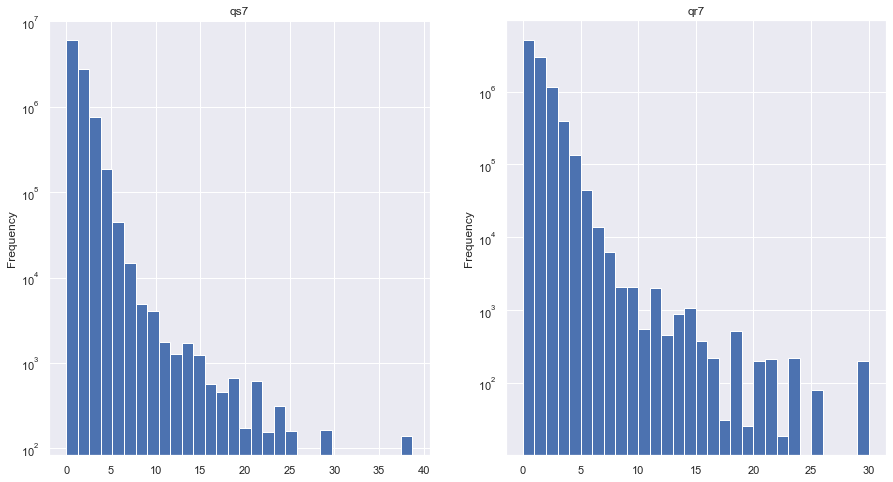

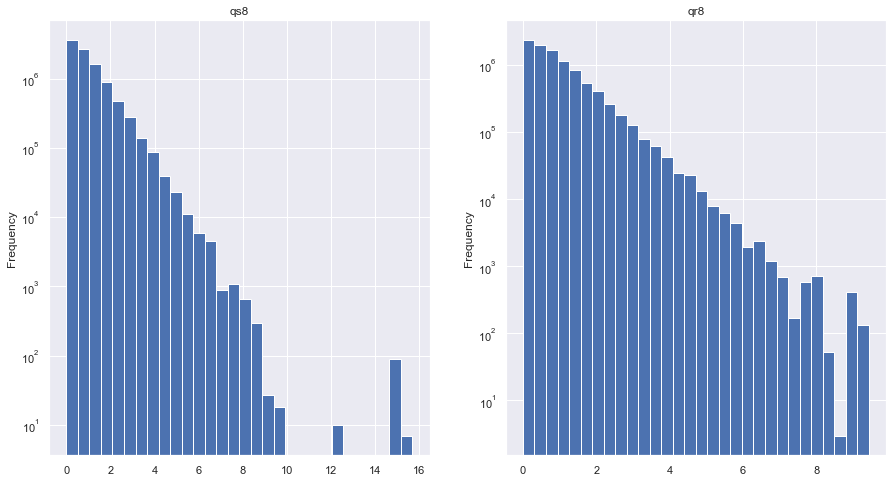

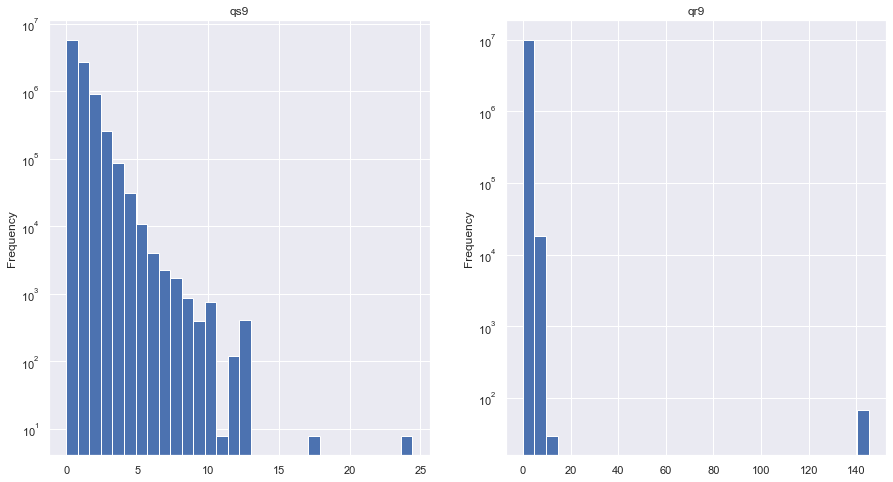

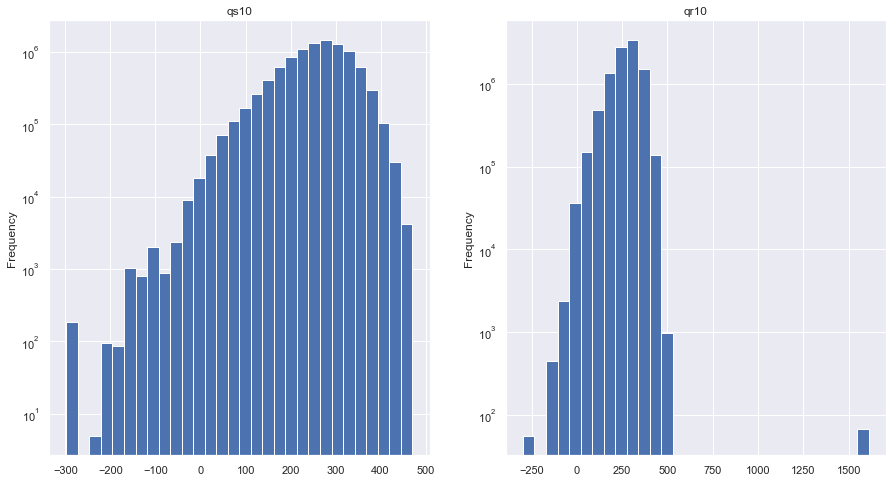

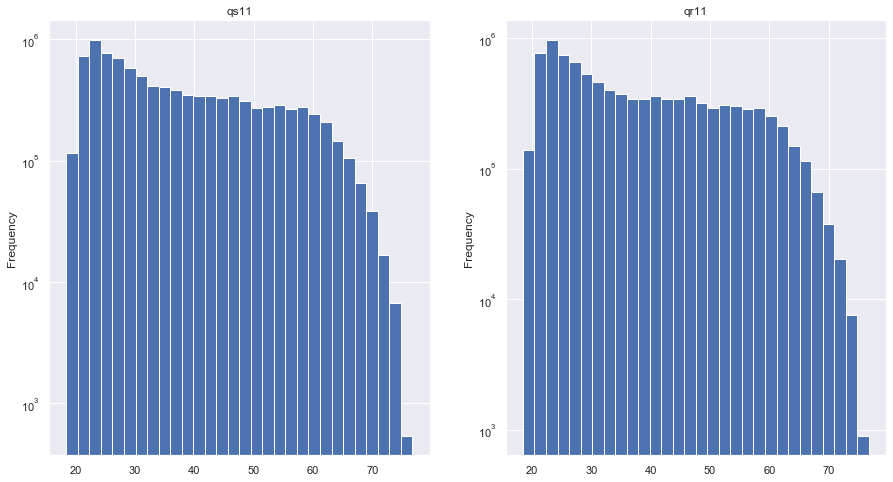

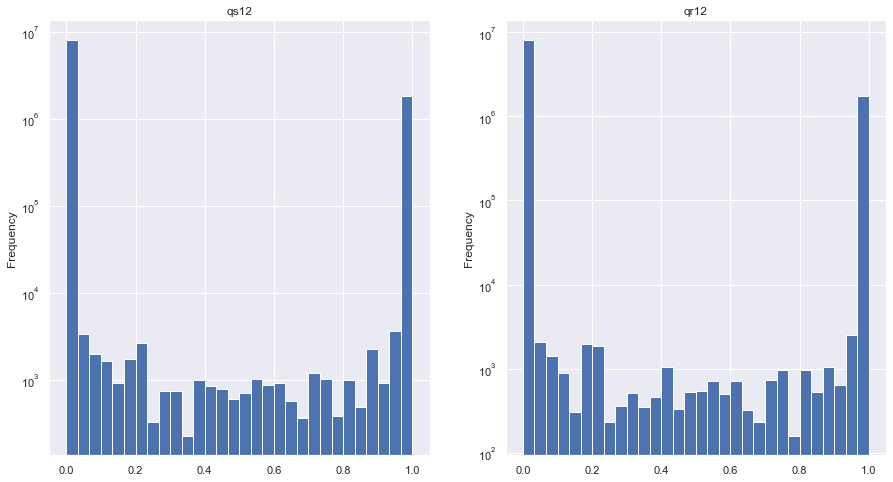

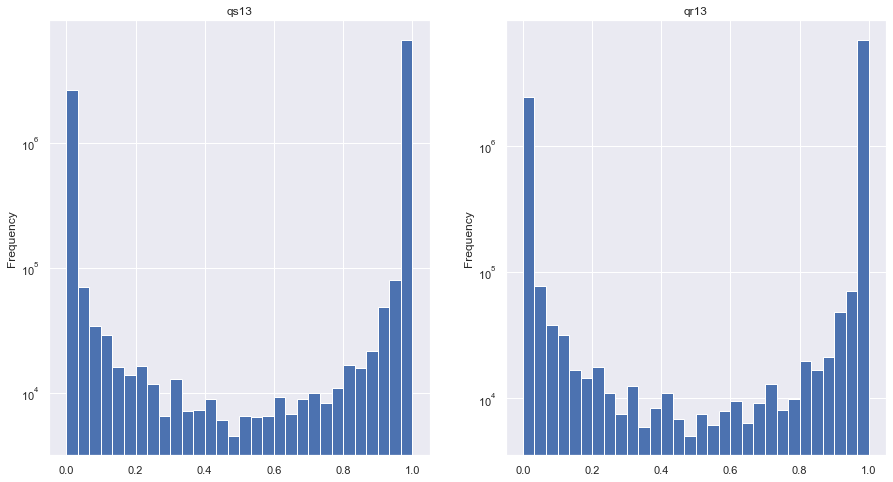

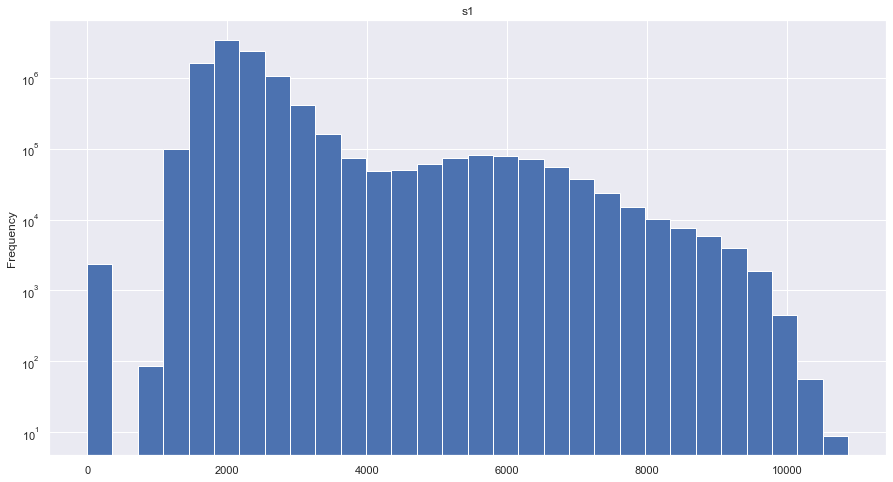

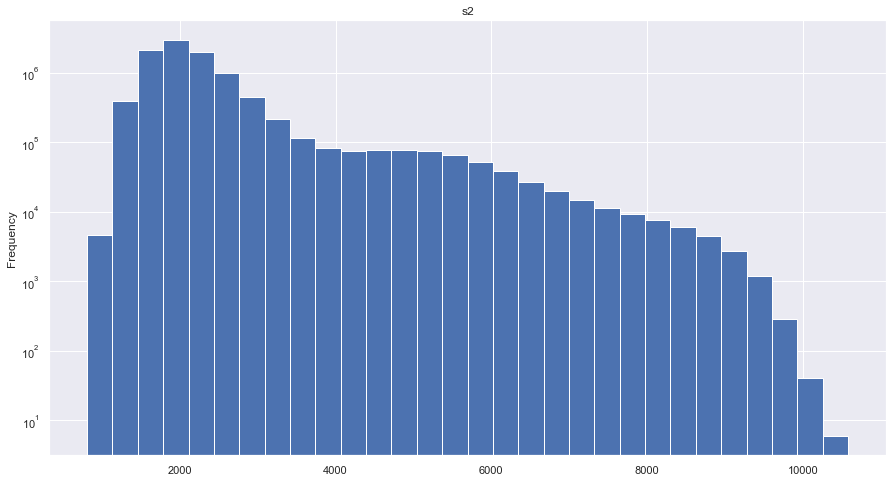

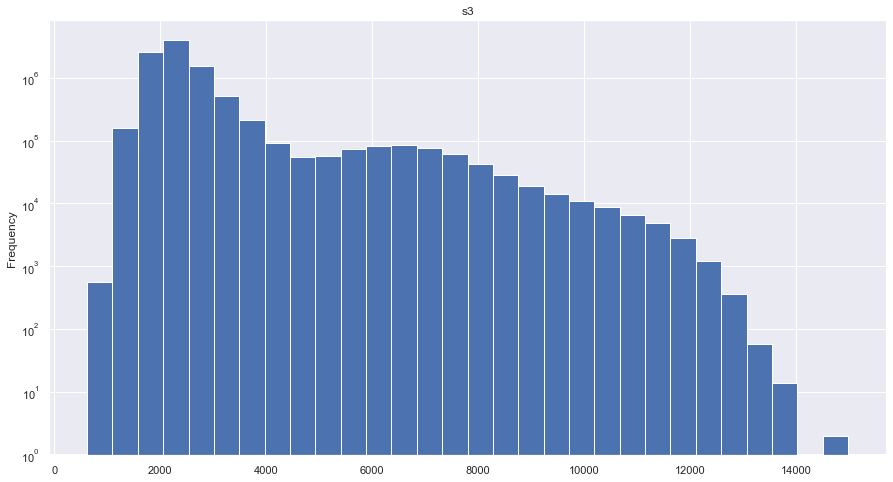

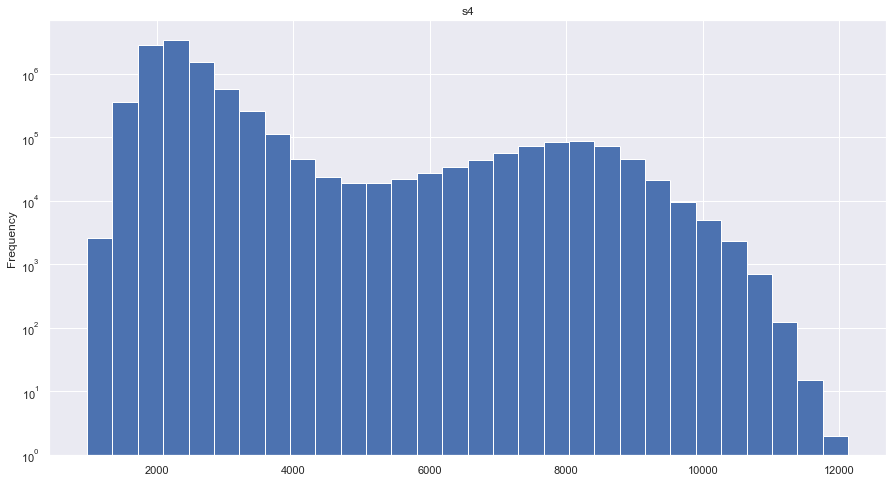

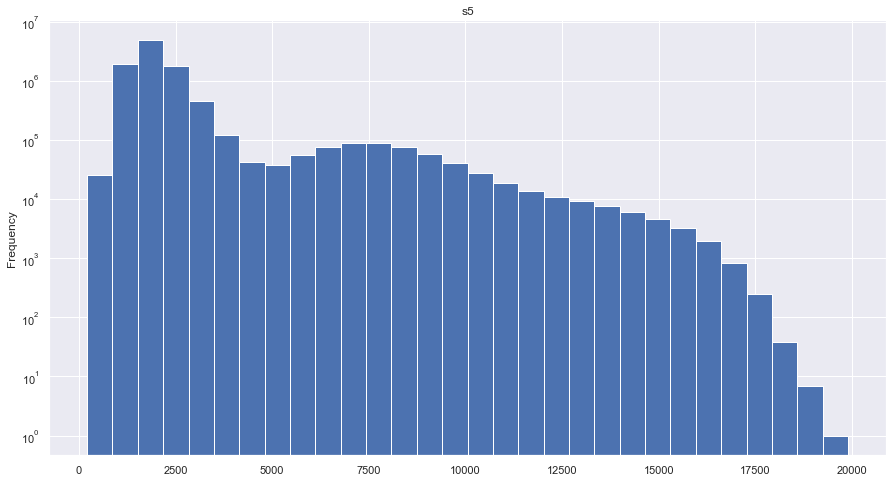

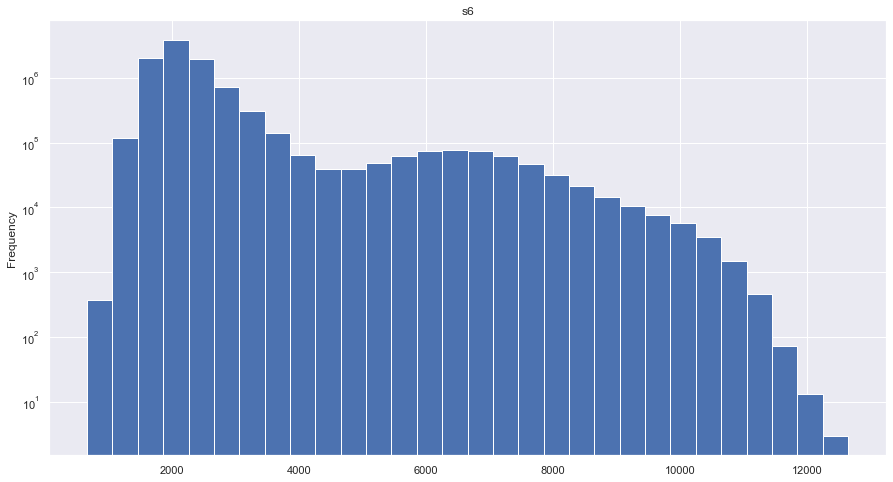

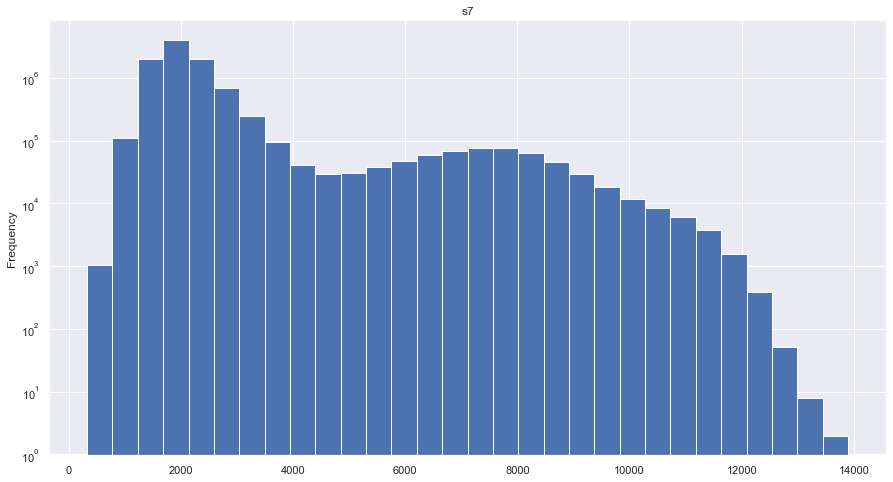

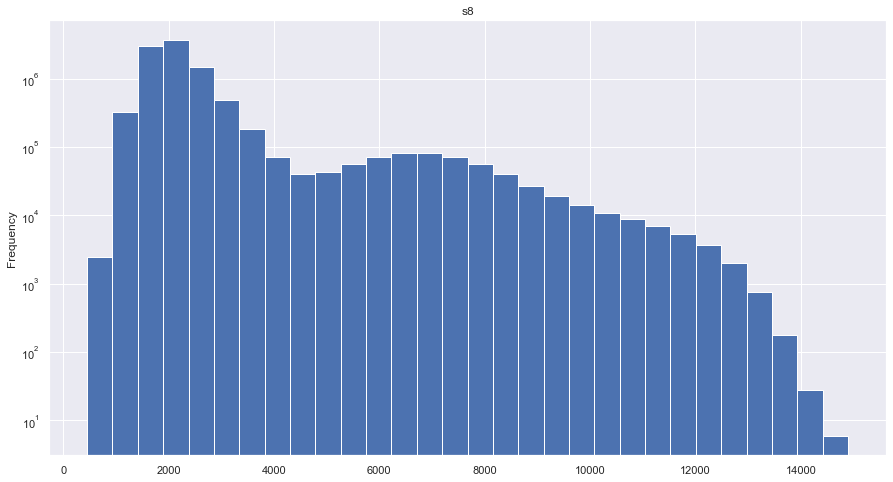

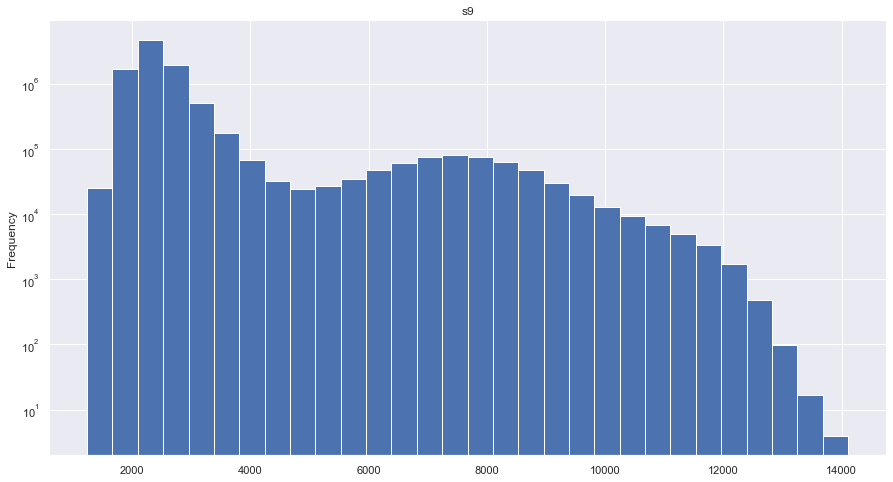

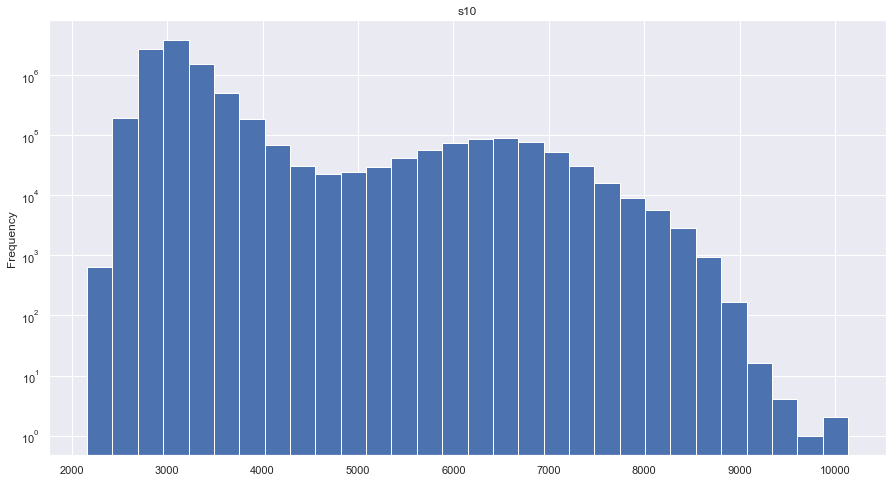

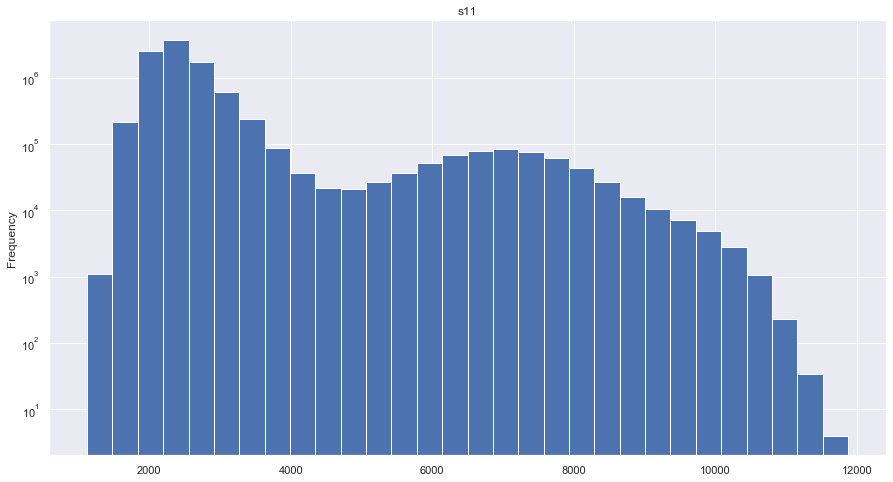

In [5]:
columns_logs = np.arange(0,13)
for c in columns_logs:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    train_data[train_data.columns[c]].plot(kind='hist', bins=30, logy=True, ax=ax1)
    ax1.set_title(train_data.columns[c])
    train_data[train_data.columns[c+13]].plot(kind='hist', bins=30, logy=True, ax=ax2)
    ax2.set_title(train_data.columns[c+13])
    plt.show()

for c in cols_S1_11:    
    train_data[c].plot(kind='hist', bins=30, logy=True)
    plt.title(c)
    plt.show()

Nous n'avons aucune information sur les différentes mesures effectuées ni leur sens.
Nous constatons la présence de distribution homogènes entre les mesures S1-11.
Les mesures QR1, QR2, QR9, QR10 semble avoir quand à elle des données "outliers", dont les valeurs sont très éloignées des autres données.


## Détection des outliers des colonnes QR


On supprime les data dont le qr1 est suppérieur au qs1 max

In [6]:
train_outliers = train_data[train_data.qr1 >train_data.qs1.max()]
train_without_outliers = train_data[train_data.qr1 <=train_data.qs1.max()]

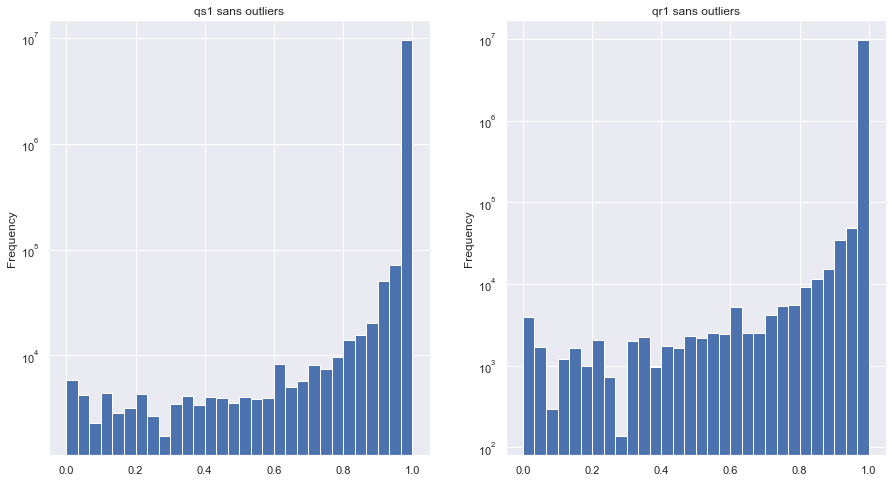

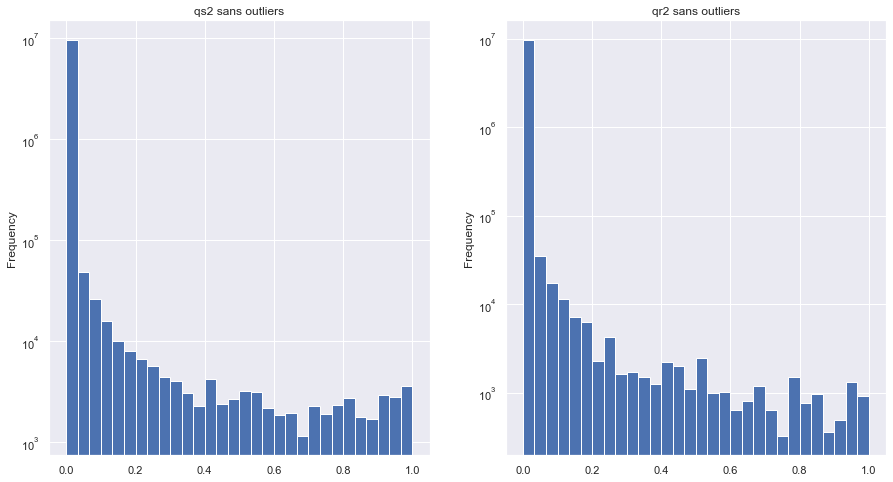

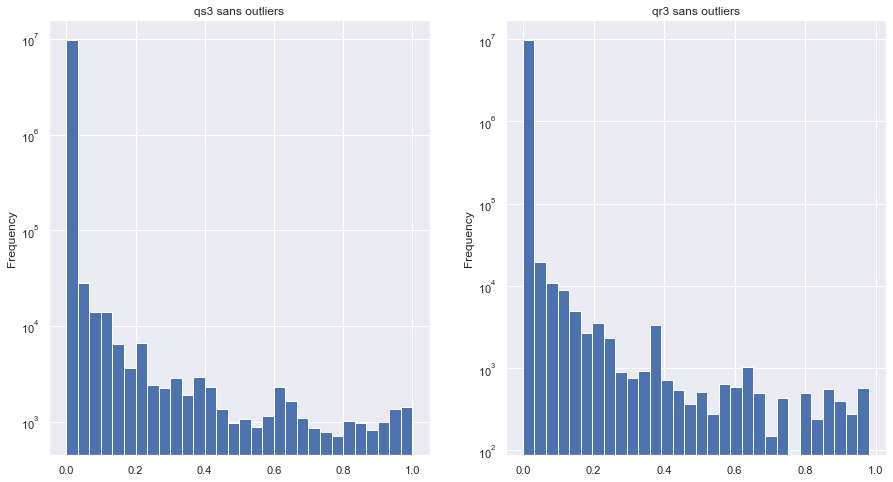

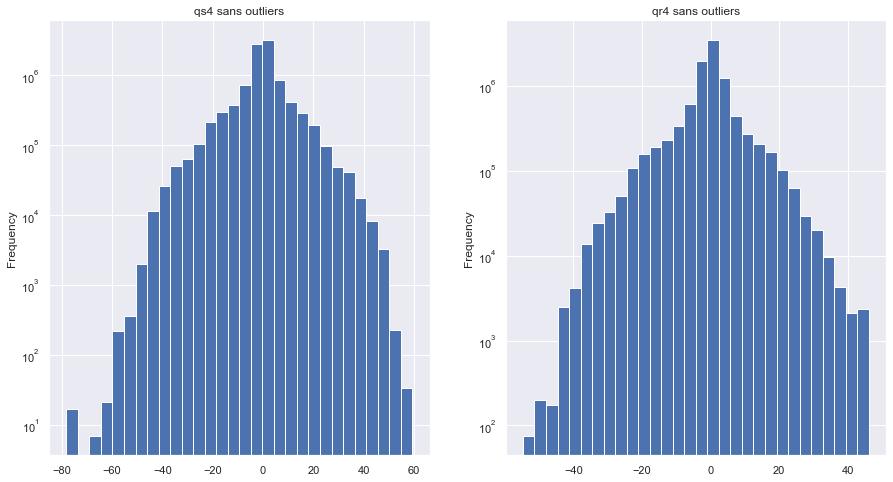

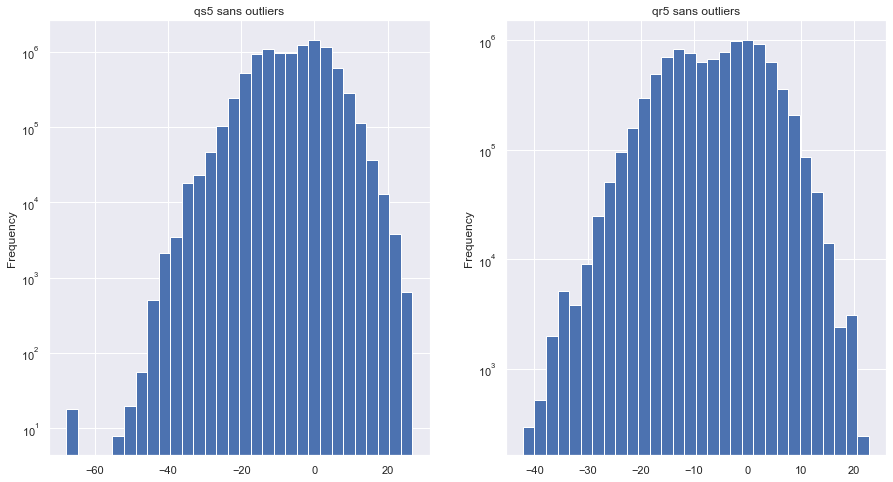

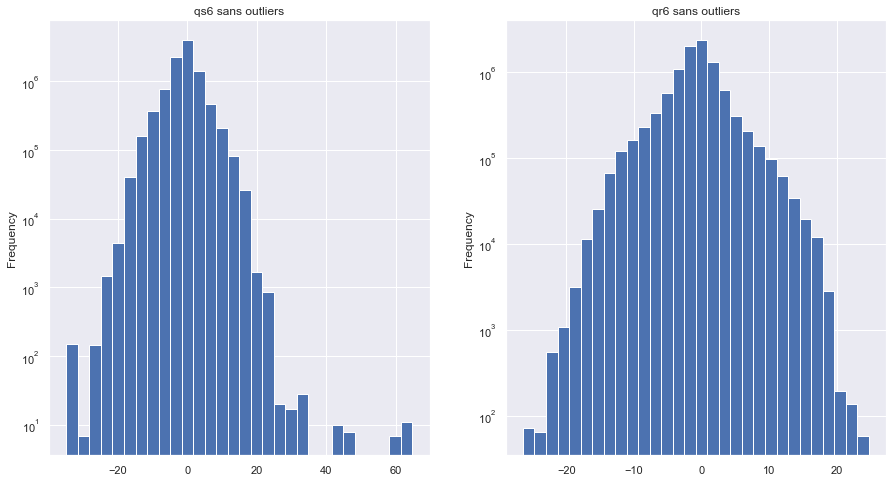

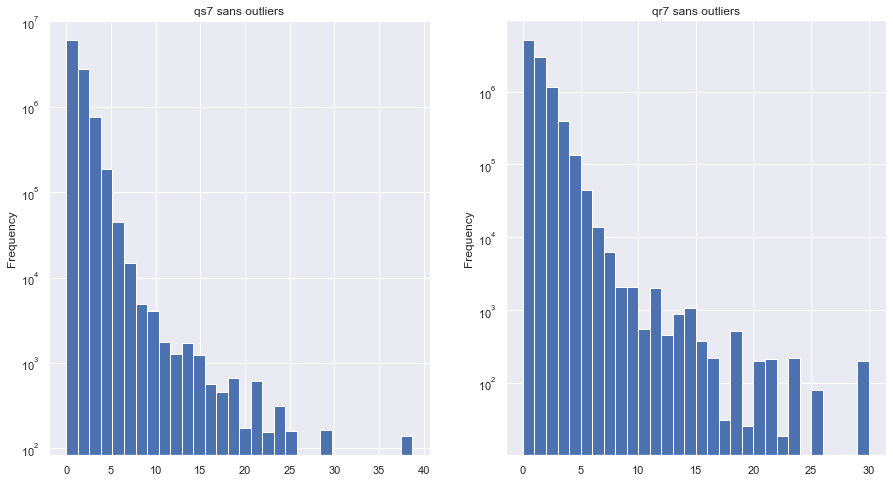

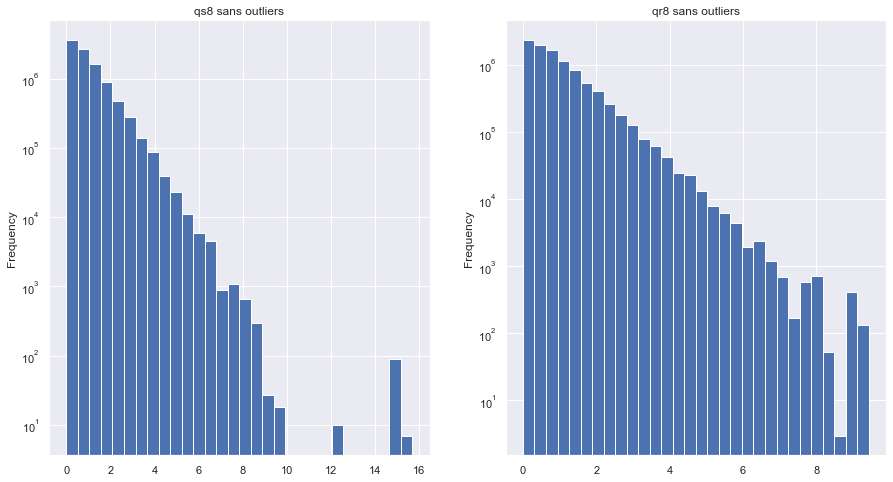

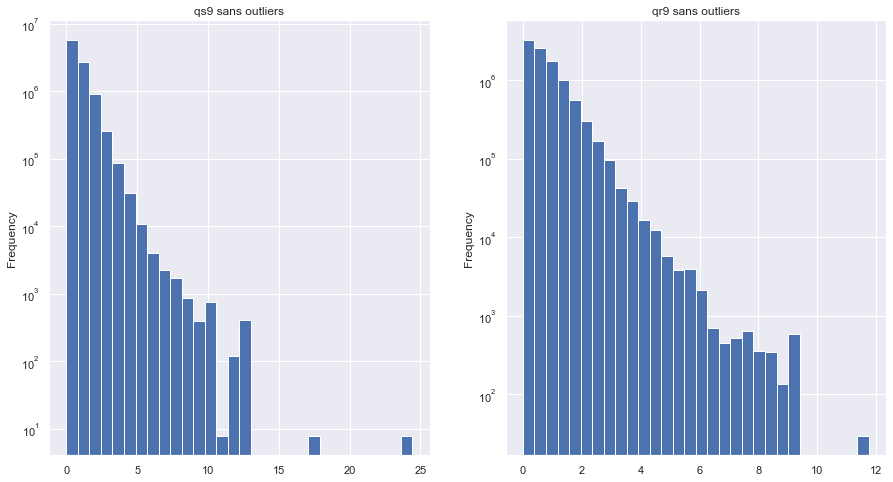

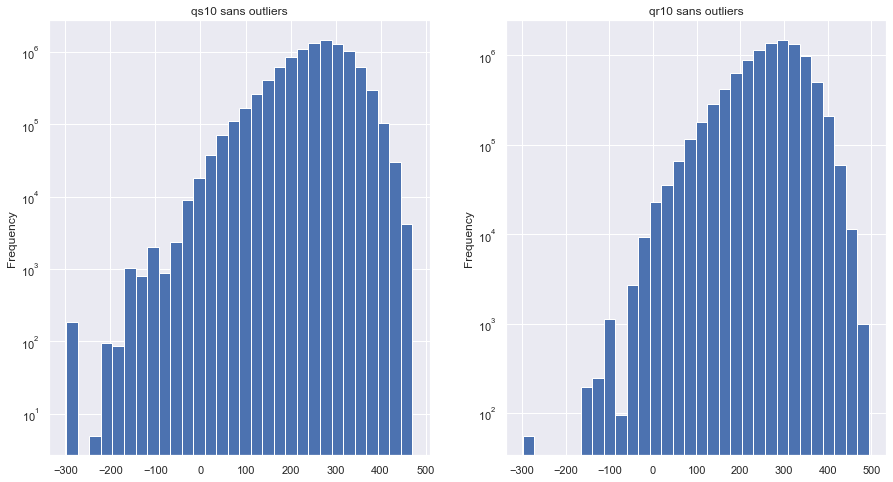

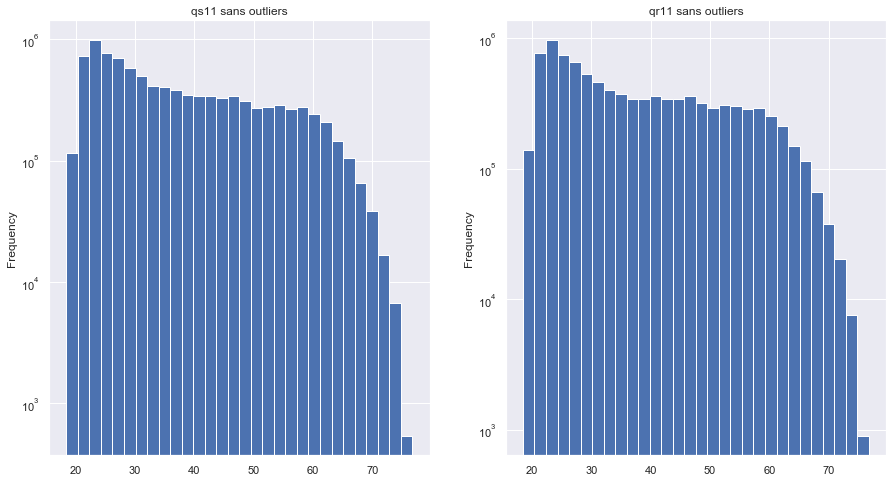

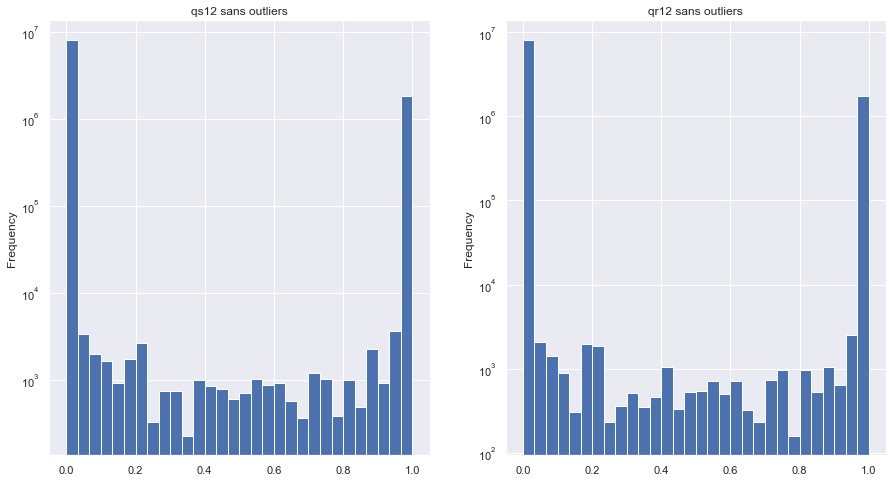

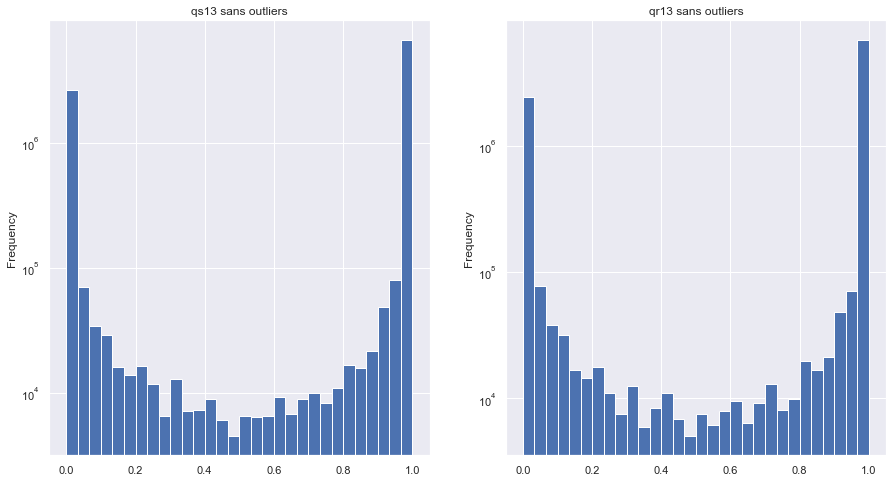

In [7]:
# Affichage des données sans les outliers
columns_logs = np.arange(0,13)
for c in columns_logs:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    train_without_outliers[train_data.columns[c]].plot(kind='hist', bins=30, logy=True, ax=ax1)
    ax1.set_title(train_data.columns[c] + " sans outliers")
    train_without_outliers[train_data.columns[c+13]].plot(kind='hist', bins=30, logy=True, ax=ax2)
    ax2.set_title(train_data.columns[c+13] + " sans outliers")
    plt.show

La distribution des données est plus homogène entre les colonnes qs et qr sans ces outliers.

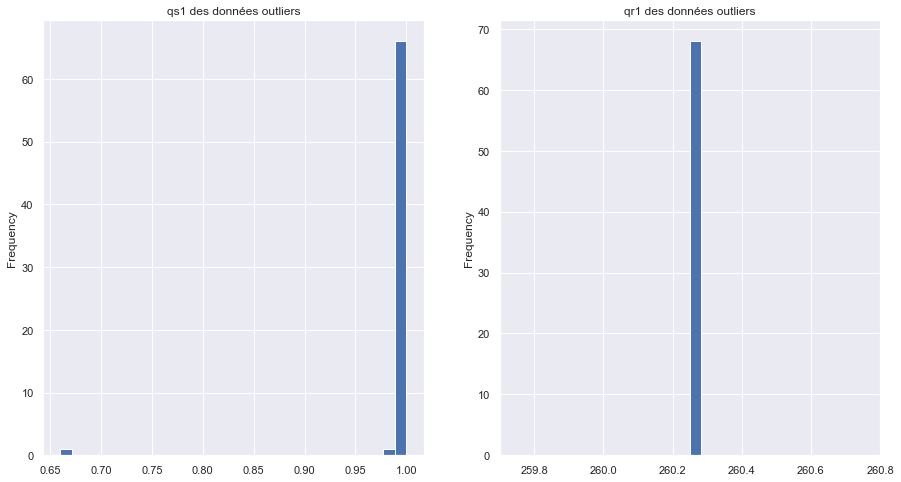

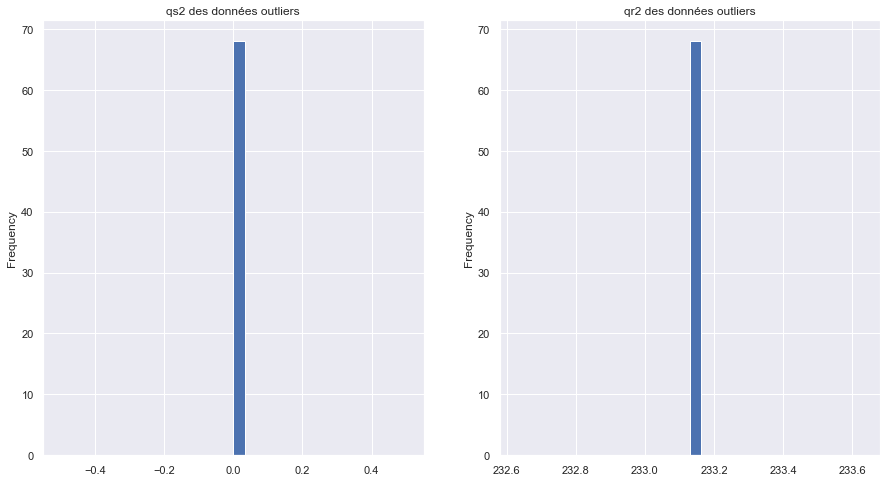

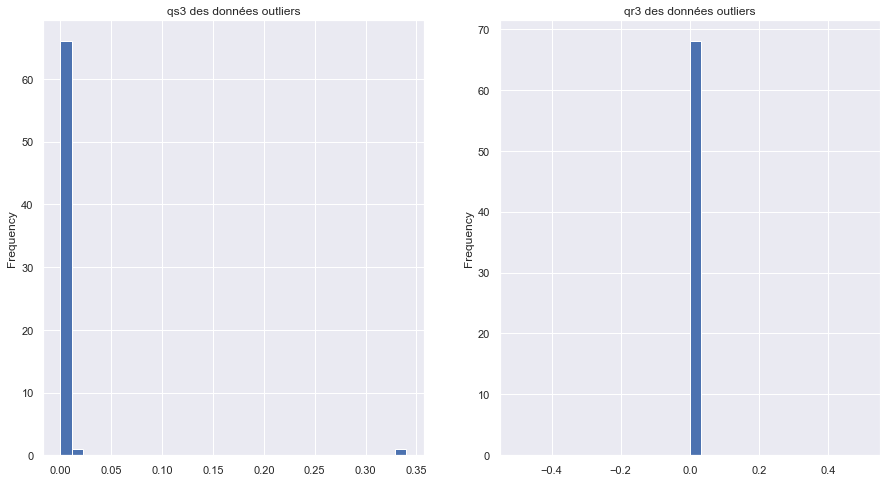

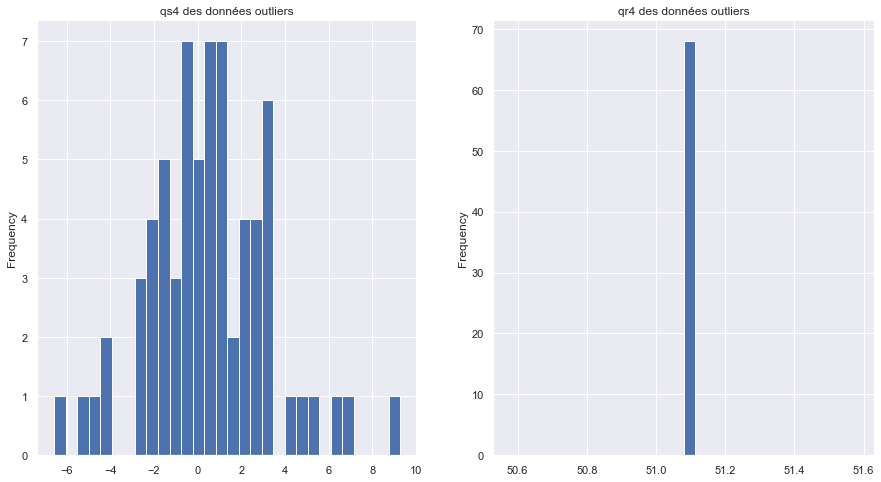

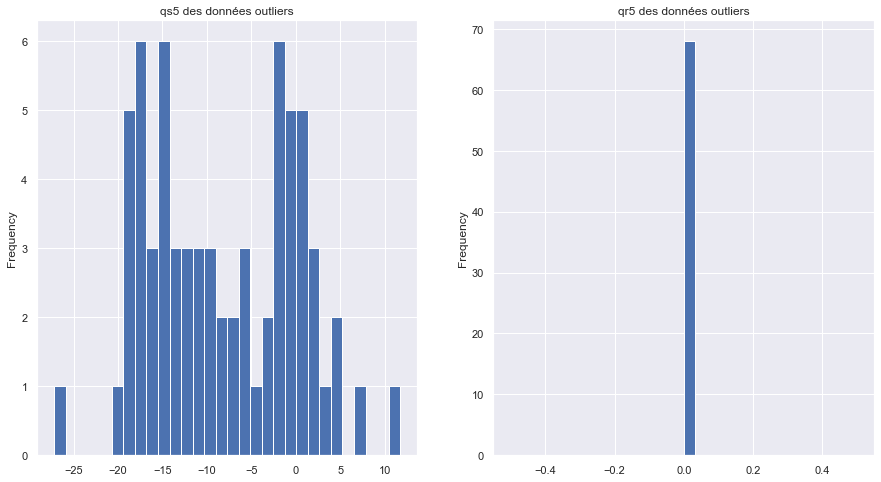

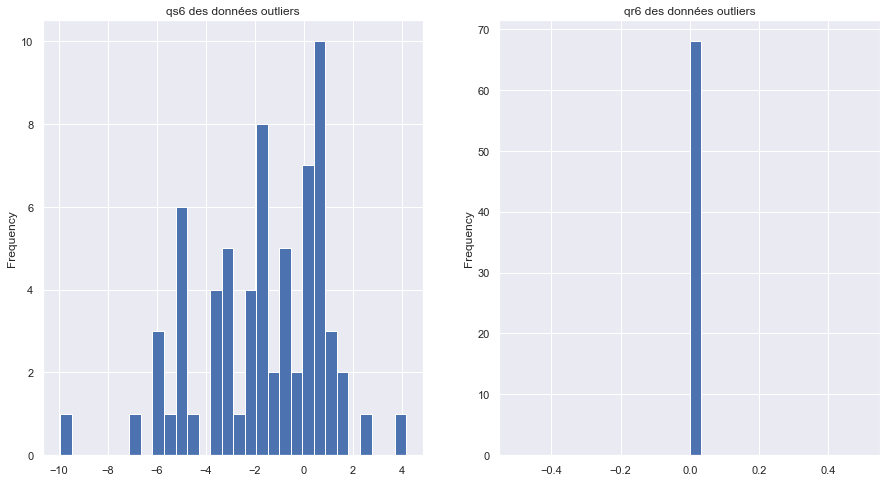

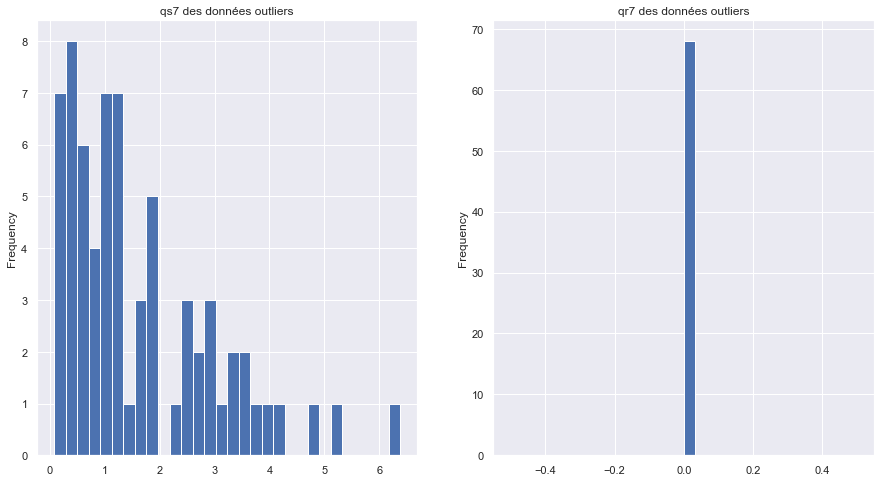

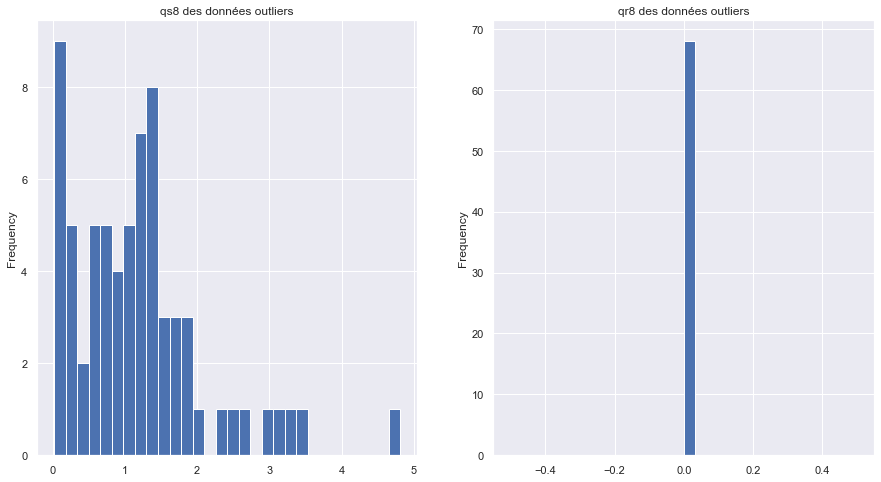

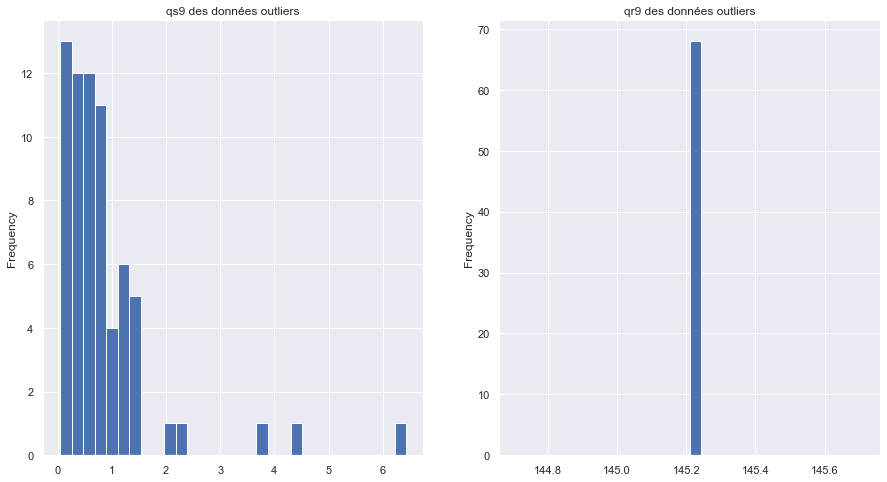

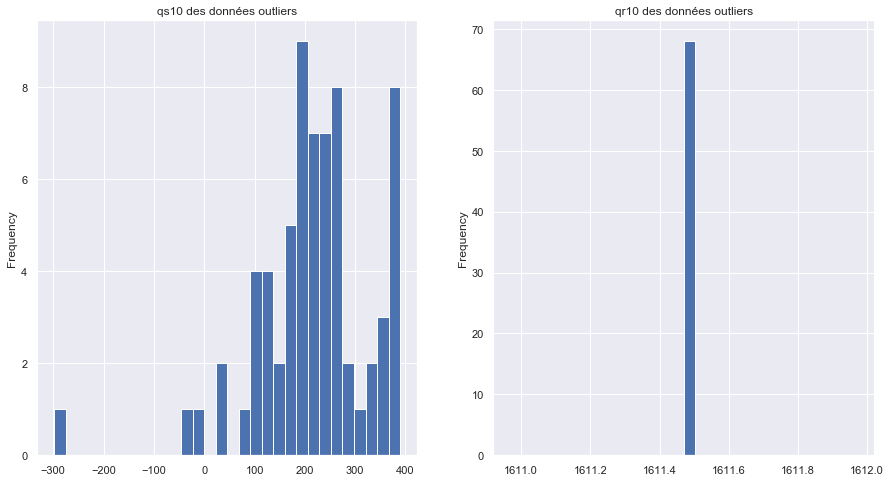

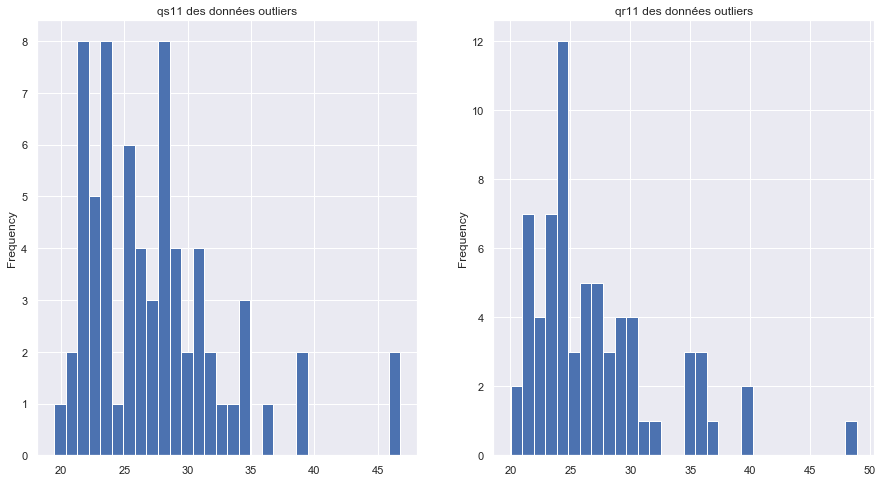

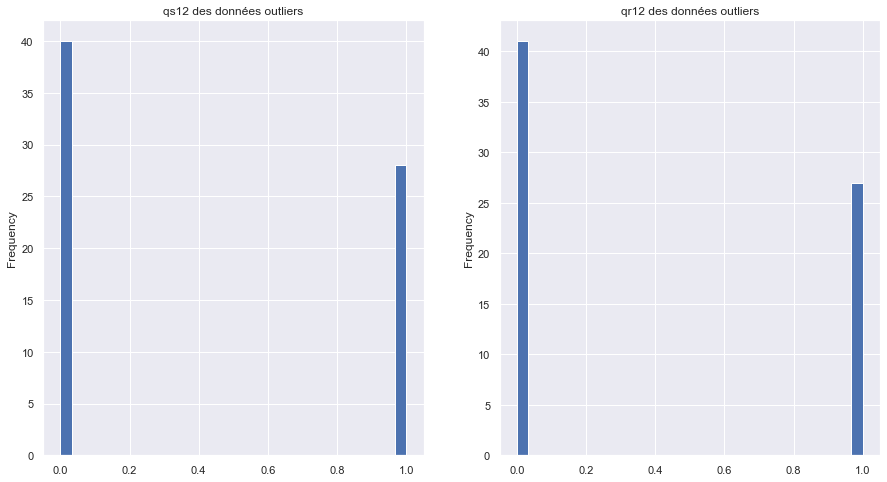

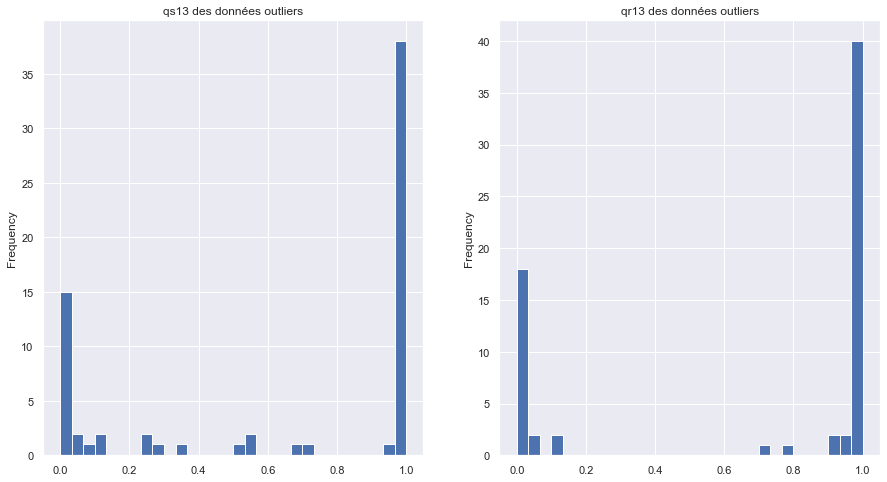

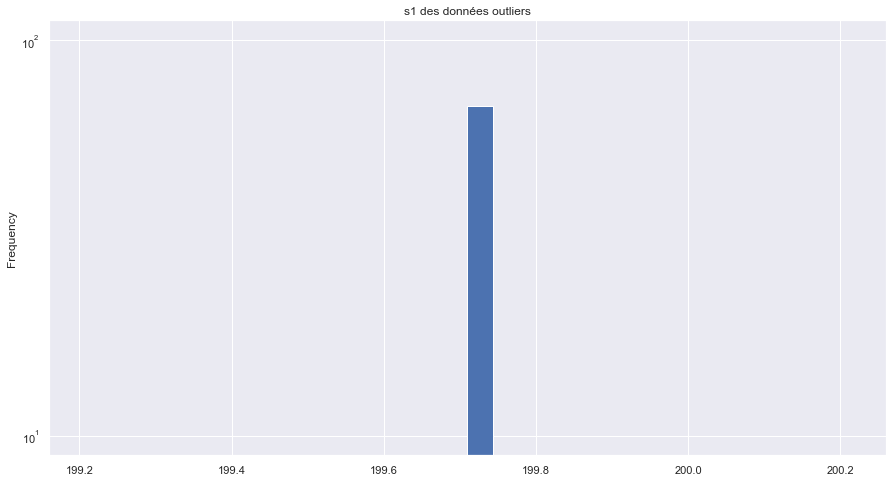

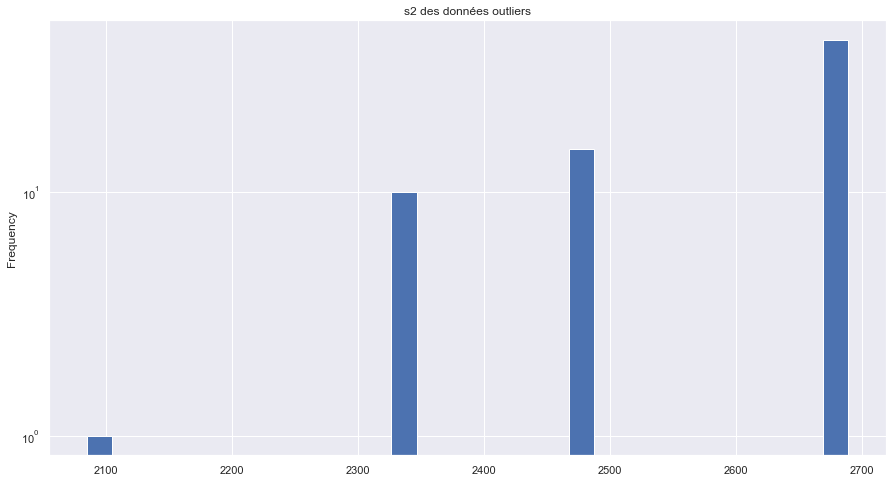

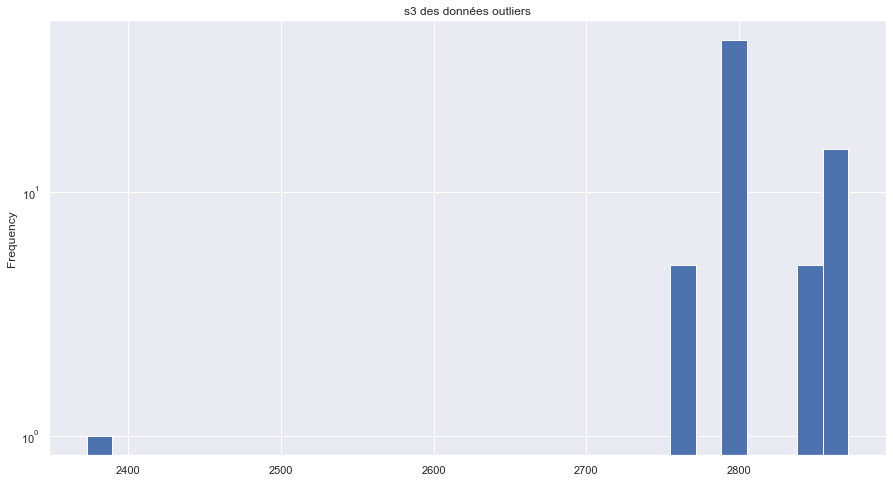

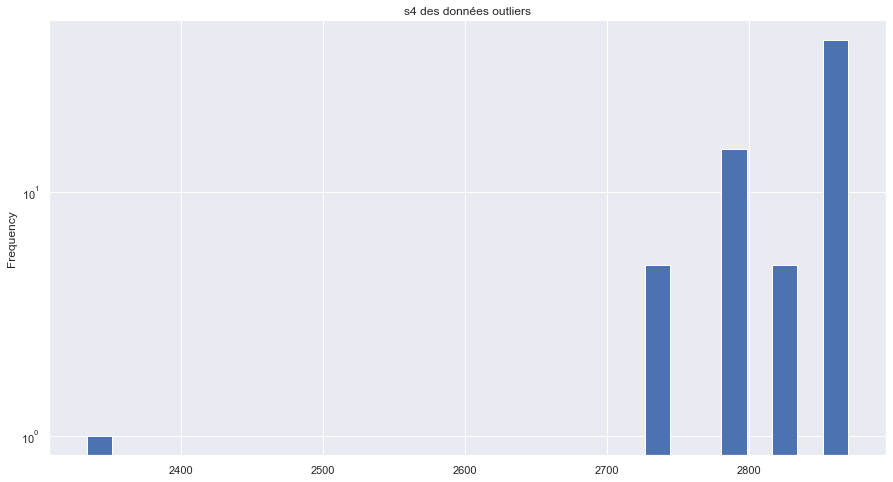

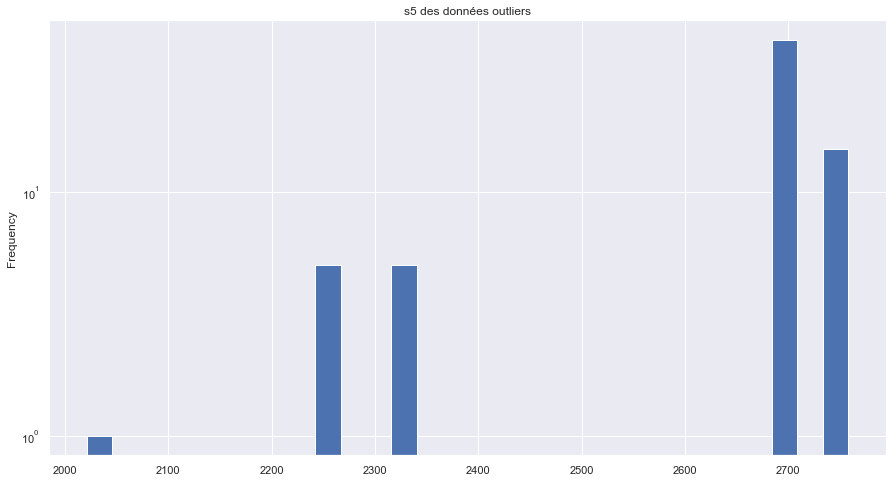

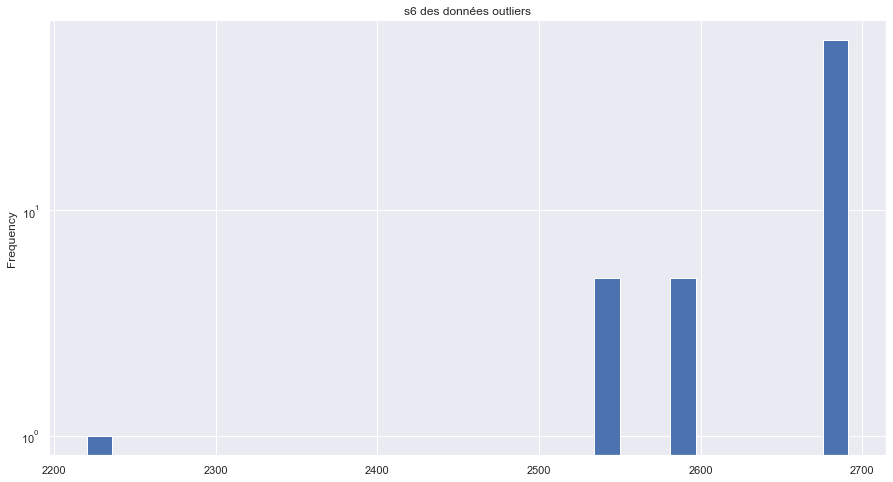

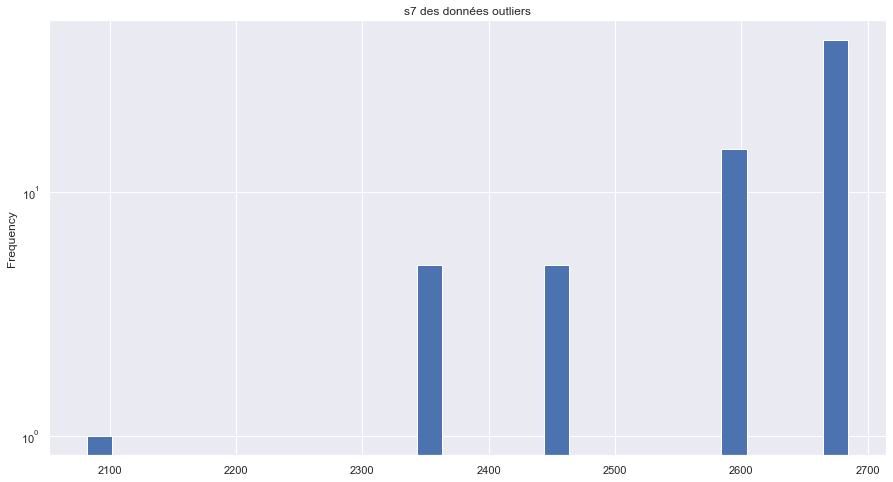

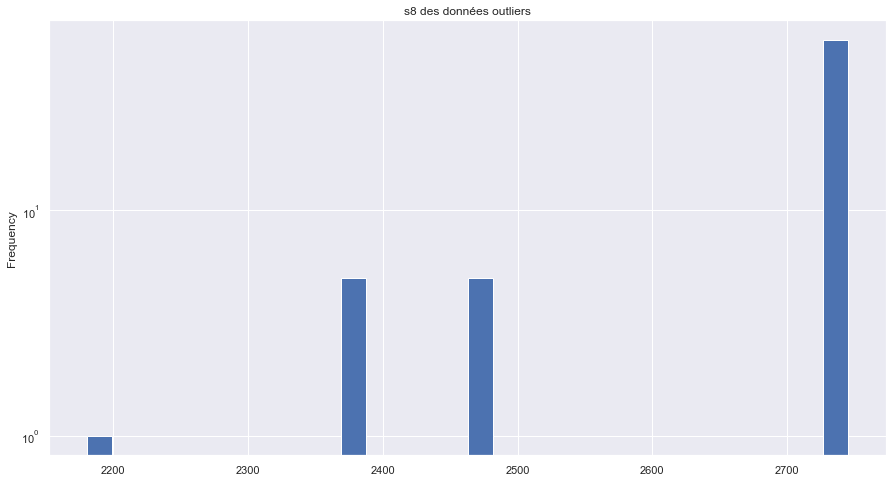

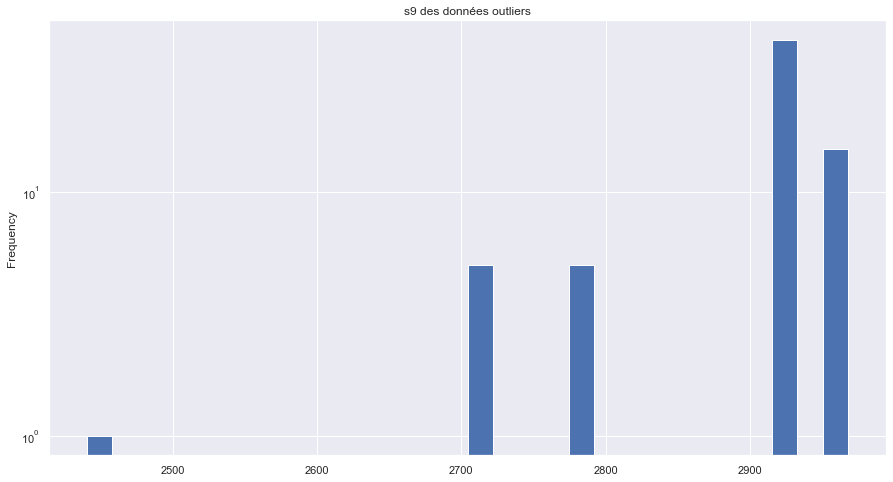

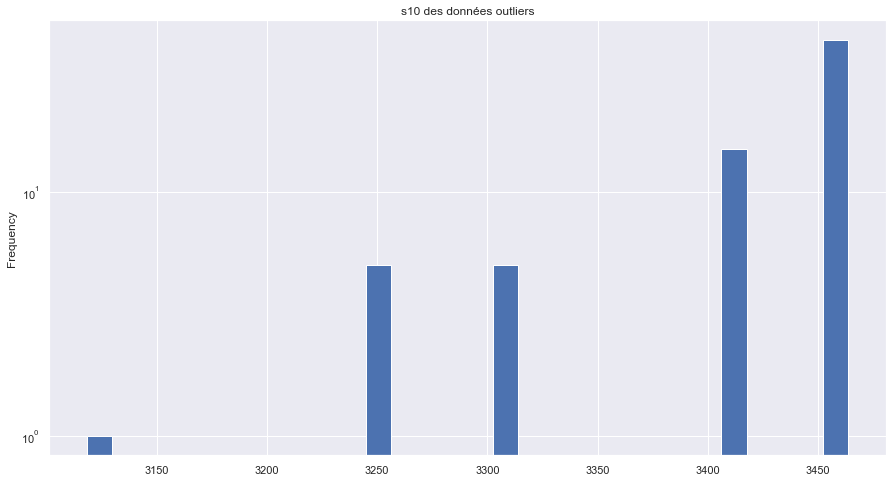

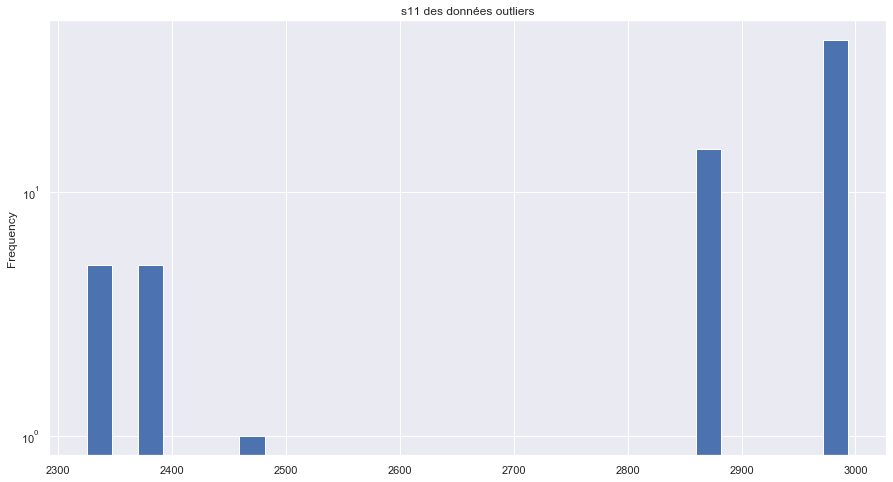

In [8]:
# Affichage de données des outliers
columns_logs = np.arange(0,13)
for c in columns_logs:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    train_outliers[train_outliers.columns[c]].plot(kind='hist', bins=30, ax=ax1)
    ax1.set_title(train_outliers.columns[c] +" des données outliers")
    train_outliers[train_outliers.columns[c+13]].plot(kind='hist', bins=30, ax=ax2)
    ax2.set_title(train_outliers.columns[c+13]+" des données outliers")
    plt.show()

for c in cols_S1_11:    
    train_outliers[c].plot(kind='hist', bins=30, logy=True)
    plt.title(c+" des données outliers")
    plt.show()

In [9]:
# On regarde les valeurs des labels
ytrain[train_data.qr1 >train_data.qs1.max()].describe()

,y
count,68.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


Tous les outliers ont des labels à 1.

In [7]:
test_outliers = test_data[test_data.qr1 >test_data.qs1.max()]
test_without_outliers = test_data[test_data.qr1 <=test_data.qs1.max()]
test_outliers_mask =test_data.qr1 >test_data.qs1.max()

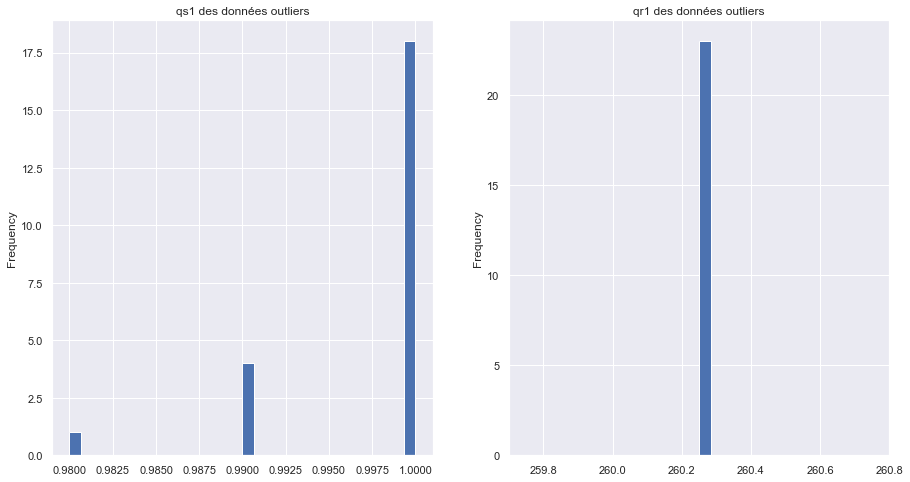

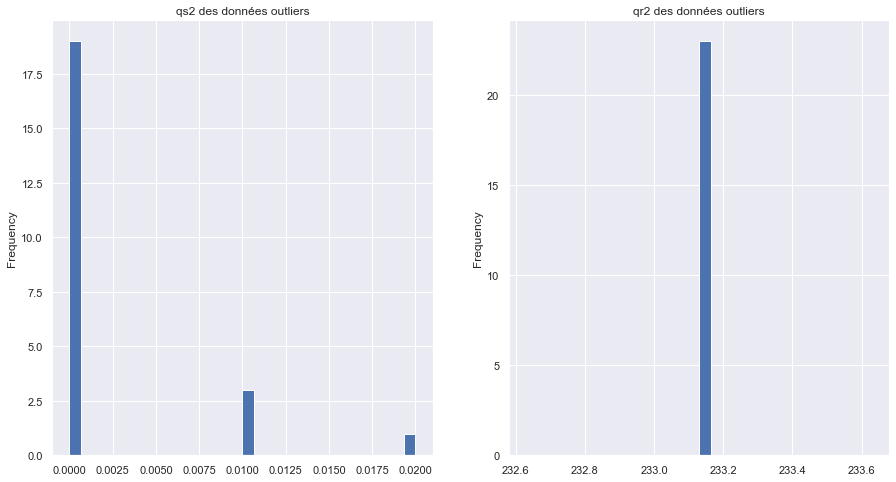

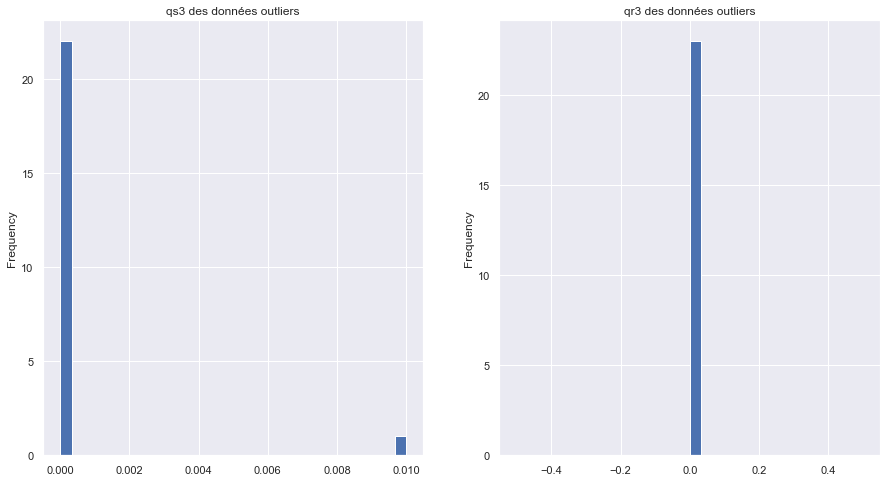

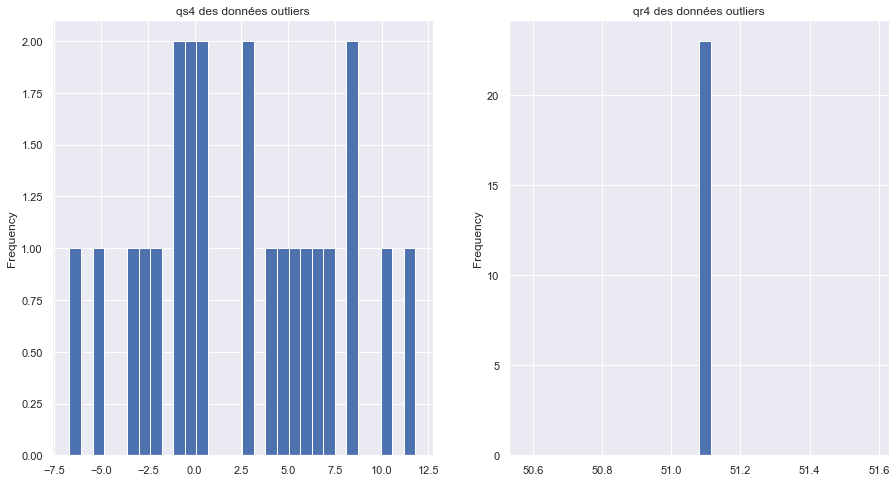

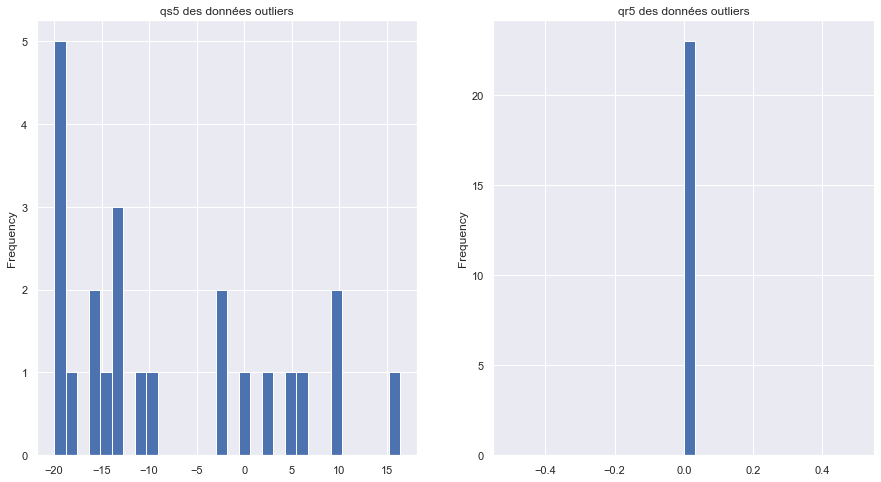

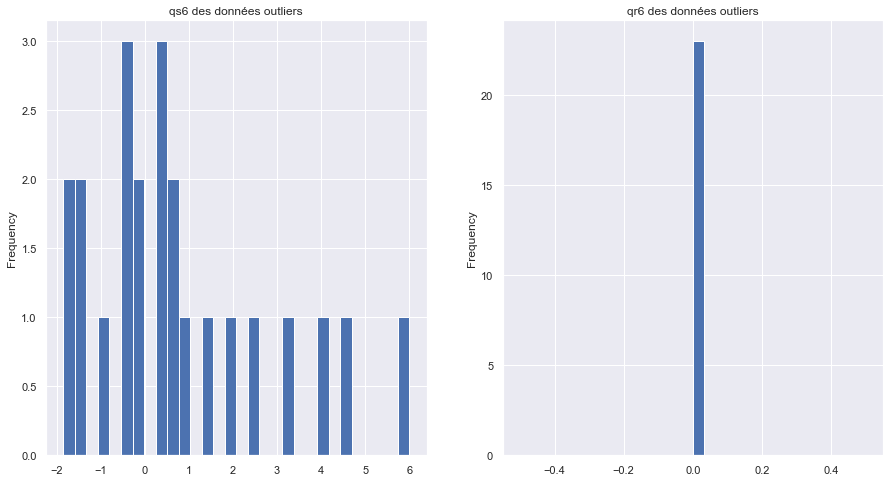

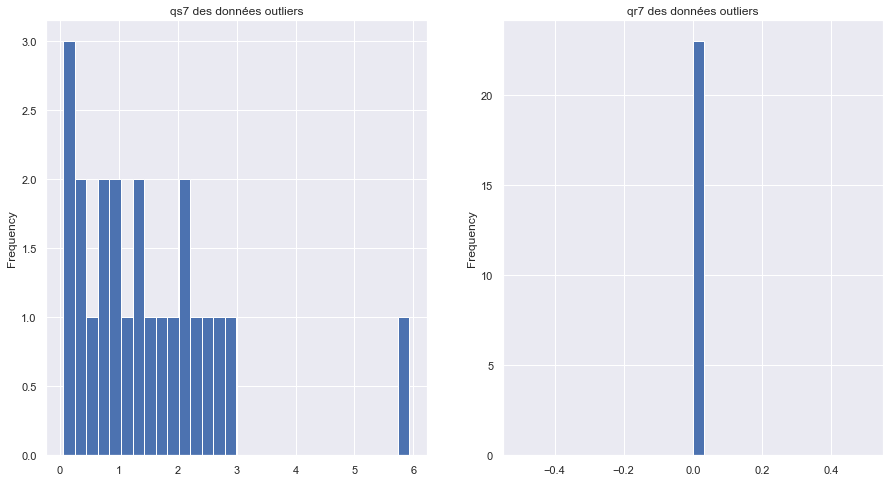

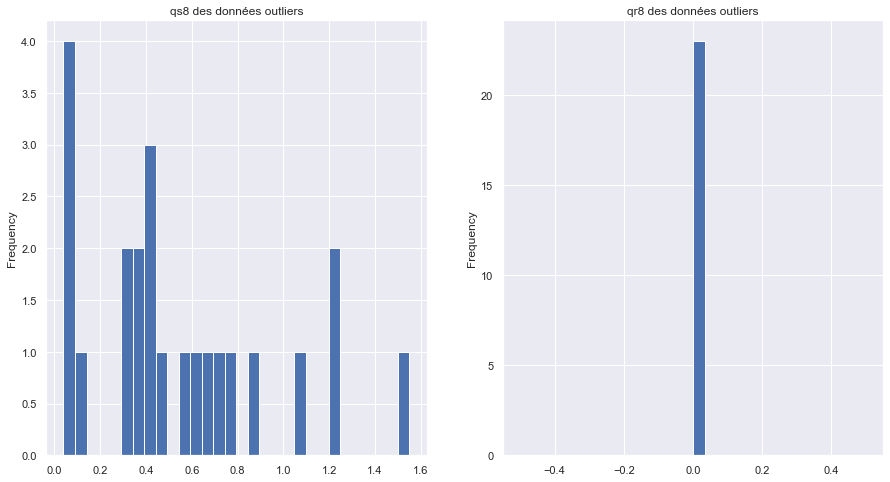

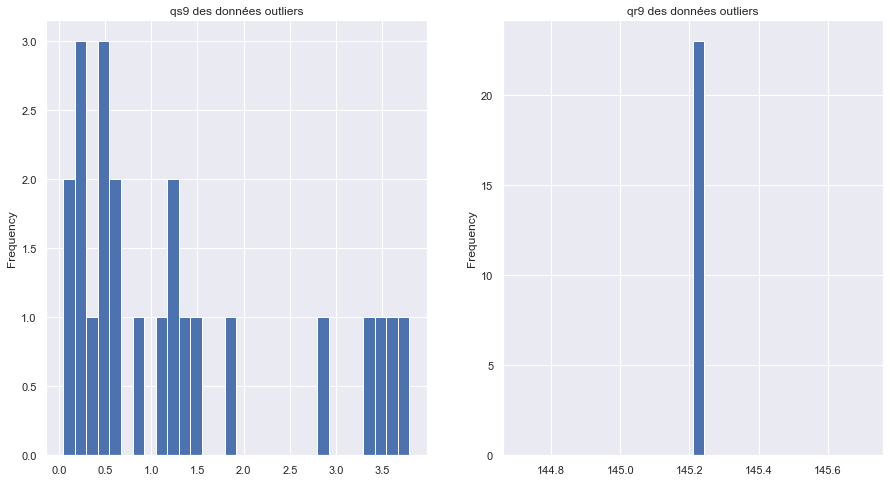

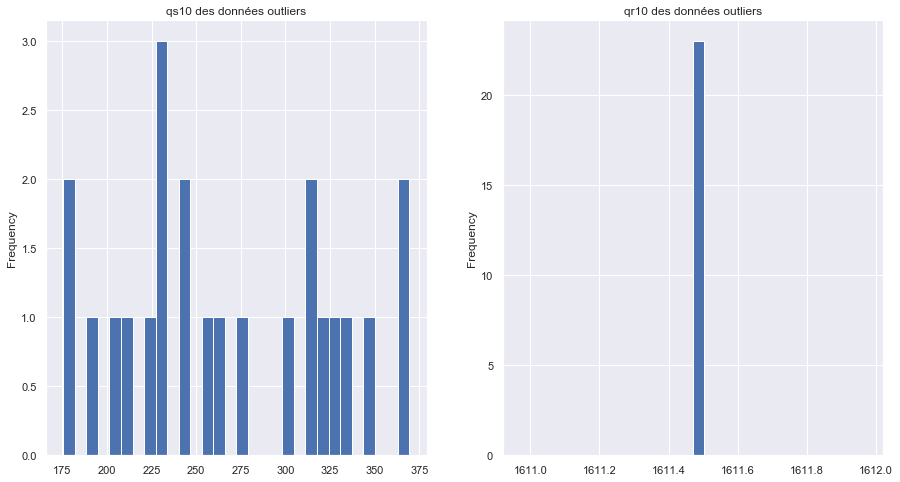

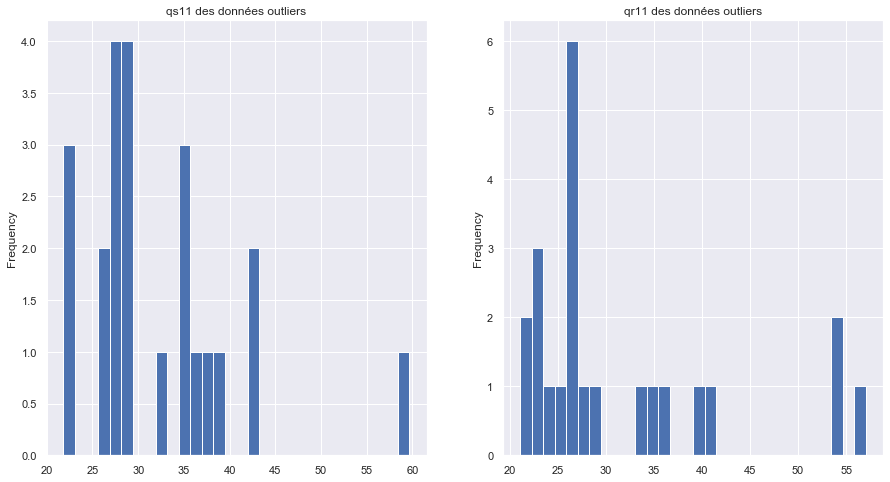

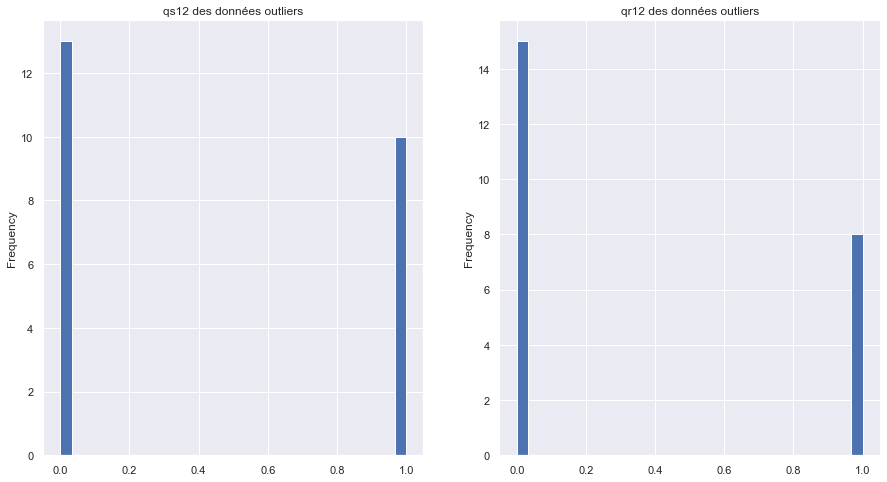

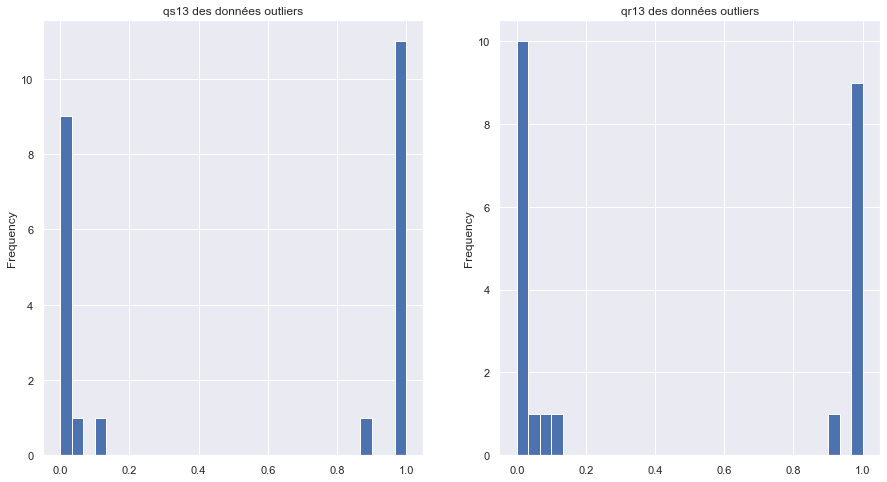

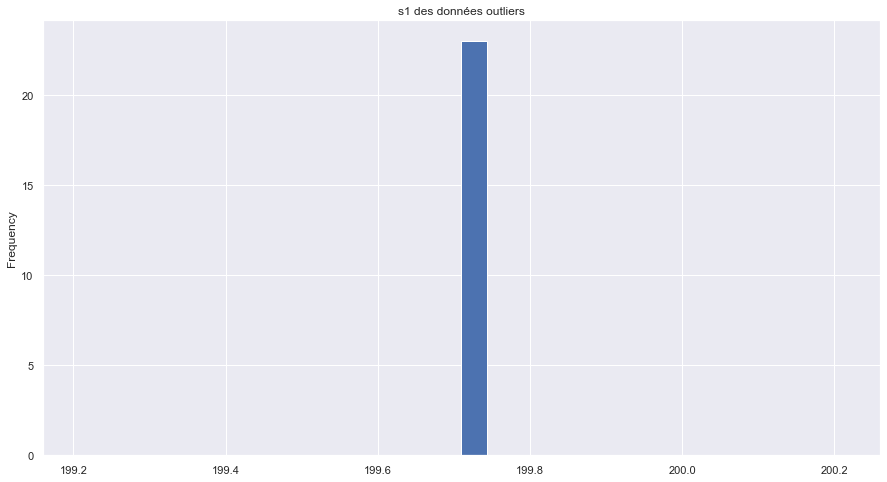

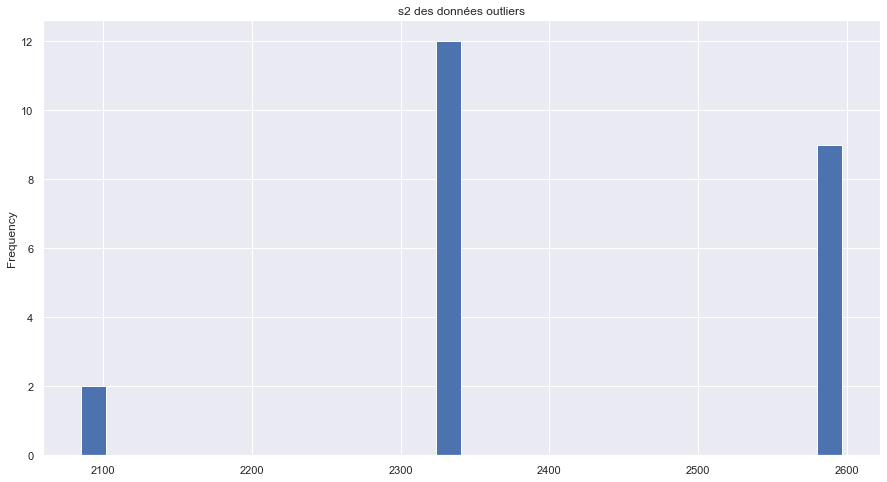

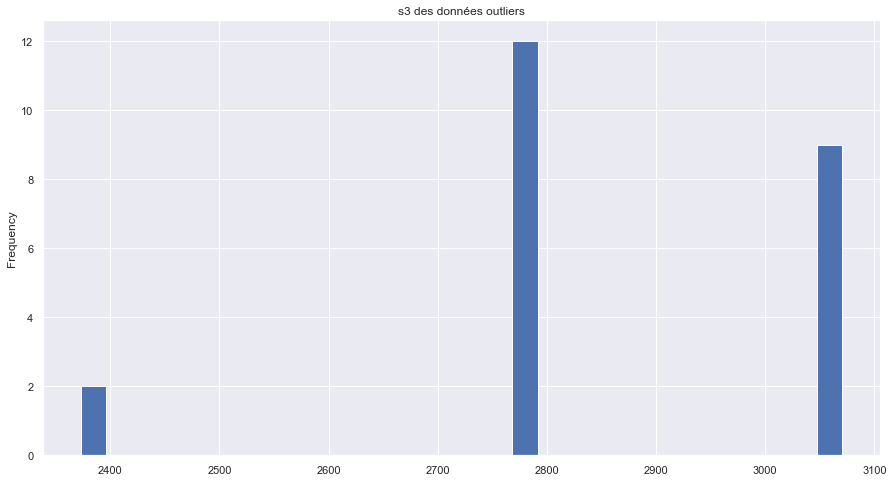

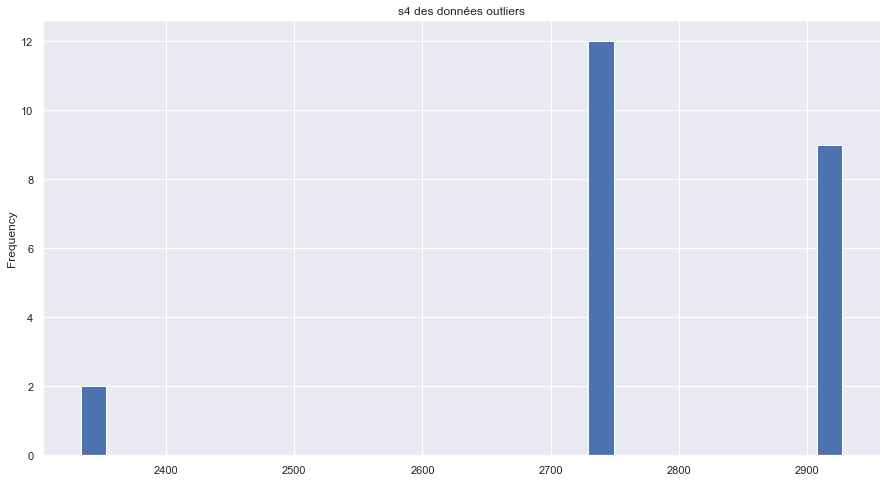

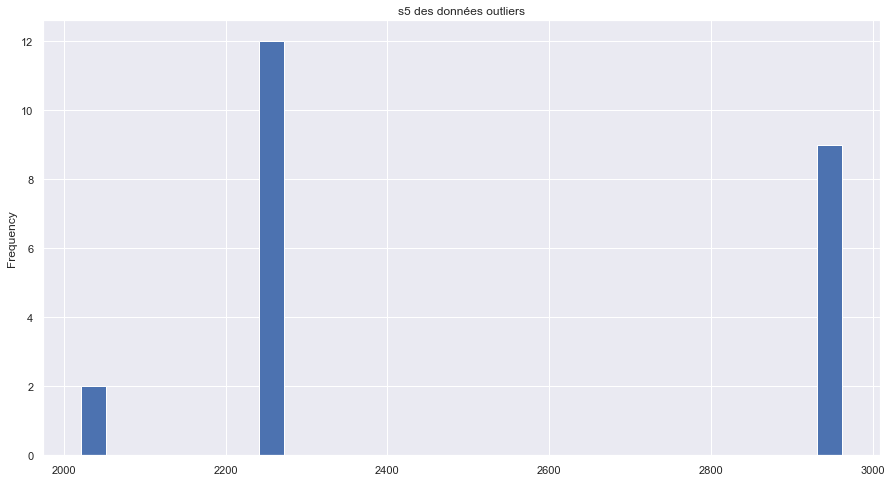

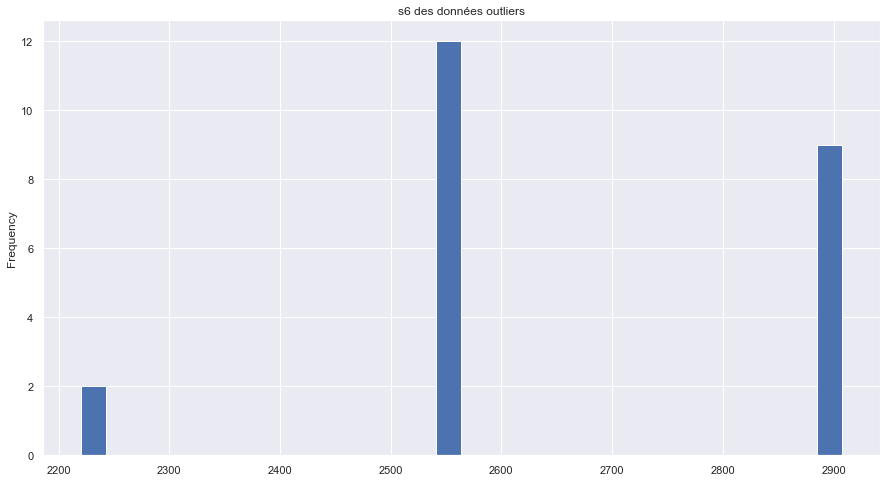

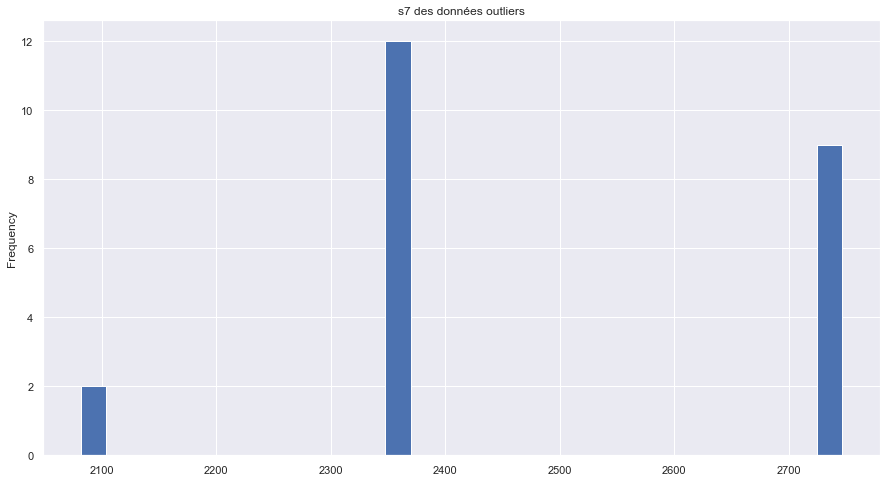

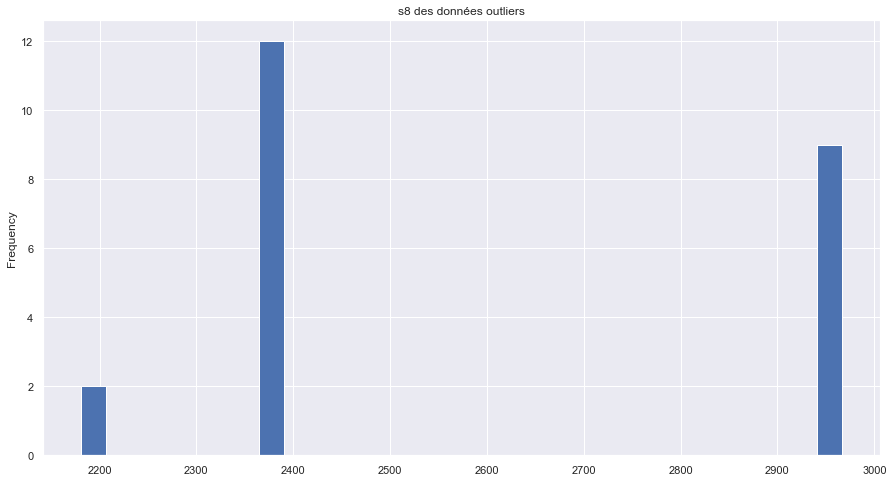

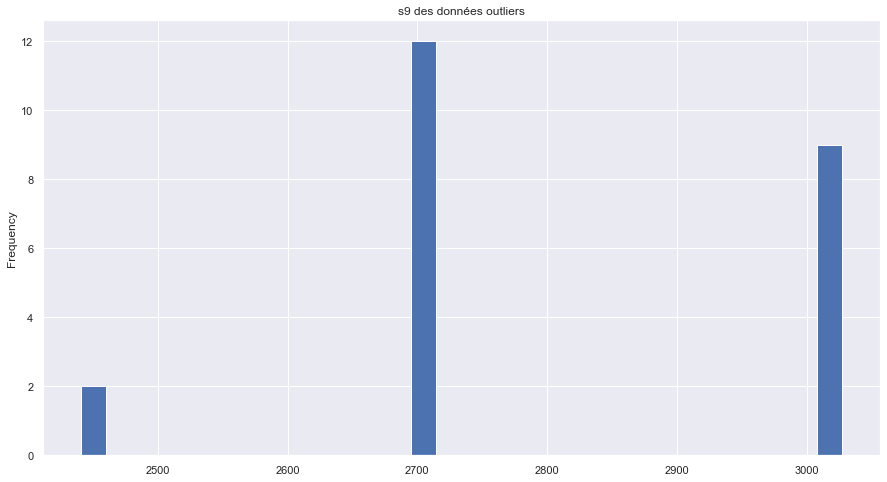

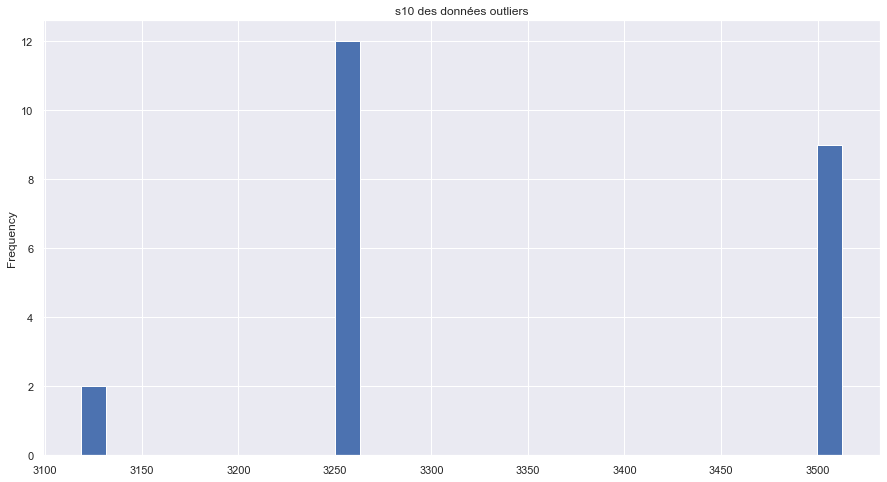

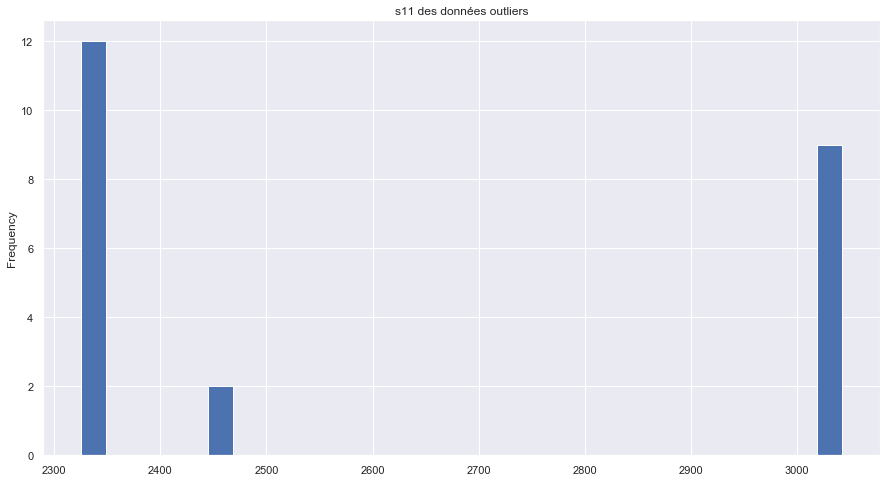

In [11]:
# Affichage de données des outliers
columns_logs = np.arange(0,13)
for c in columns_logs:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    test_outliers[train_outliers.columns[c]].plot(kind='hist', bins=30, ax=ax1)
    ax1.set_title(train_outliers.columns[c] +" des données outliers")
    test_outliers[train_outliers.columns[c+13]].plot(kind='hist', bins=30, ax=ax2)
    ax2.set_title(train_outliers.columns[c+13]+" des données outliers")
    plt.show()

for c in cols_S1_11:    
    test_outliers[c].plot(kind='hist', bins=30)
    plt.title(c+" des données outliers")
    plt.show()

In [12]:
train_outliers.head(10)

,qs1,qs2,qs3,qs4,qs5,qs6,qs7,qs8,qs9,qs10,qs11,qs12,qs13,qr1,qr2,qr3,qr4,qr5,qr6,qr7,qr8,qr9,qr10,qr11,qr12,qr13,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,Label
577400,1.0,0.0,0.0,0.63,-1.71,1.62,0.85,0.90,0.46,377.56,38.99,0.0,1.00,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,36.84,0.0,1.00,199.71,2487.45,2871.30,2782.99,2757.73,2682.57,2590.18,2745.09,2967.63,3414.54,2876.74,1
677237,1.0,0.0,0.0,2.00,-10.40,-0.78,0.95,0.06,1.44,259.18,25.50,1.0,0.29,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,23.20,1.0,0.96,199.71,2688.78,2802.80,2869.77,2697.62,2691.26,2684.47,2727.51,2922.18,3463.58,2993.56,1
898968,1.0,0.0,0.0,-0.50,2.10,-1.01,0.43,0.13,0.22,389.39,24.52,1.0,0.54,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,28.07,1.0,0.02,199.71,2487.45,2871.30,2782.99,2757.73,2682.57,2590.18,2745.09,2967.63,3414.54,2876.74,1
1020653,1.0,0.0,0.0,7.02,-14.99,-3.06,2.52,1.42,0.16,-27.56,21.57,0.0,1.00,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,24.45,0.0,0.00,199.71,2688.78,2802.80,2869.77,2697.62,2691.26,2684.47,2727.51,2922.18,3463.58,2993.56,1
1098358,1.0,0.0,0.0,0.69,-3.18,-4.97,1.17,1.36,0.20,225.65,23.46,0.0,0.05,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,20.03,0.0,0.01,199.71,2688.78,2802.80,2869.77,2697.62,2691.26,2684.47,2727.51,2922.18,3463.58,2993.56,1
1156634,1.0,0.0,0.0,0.31,-17.01,0.26,3.27,1.57,1.50,167.68,22.71,1.0,0.50,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,23.15,0.0,1.00,199.71,2688.78,2802.80,2869.77,2697.62,2691.26,2684.47,2727.51,2922.18,3463.58,2993.56,1
1403846,1.0,0.0,0.0,-1.92,-20.22,0.36,0.48,1.37,0.79,227.70,24.94,0.0,0.24,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,26.29,1.0,0.13,199.71,2335.63,2771.13,2732.20,2252.74,2548.68,2360.15,2385.03,2708.02,3255.29,2325.28,1
1509577,1.0,0.0,0.0,1.56,-1.44,0.53,0.63,1.08,1.06,191.14,23.38,1.0,1.00,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,25.33,1.0,1.00,199.71,2688.78,2802.80,2869.77,2697.62,2691.26,2684.47,2727.51,2922.18,3463.58,2993.56,1
1794345,1.0,0.0,0.0,3.32,-5.19,-4.82,0.68,3.49,0.06,187.14,31.26,1.0,0.11,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,24.82,1.0,0.01,199.71,2688.78,2802.80,2869.77,2697.62,2691.26,2684.47,2727.51,2922.18,3463.58,2993.56,1
1859779,1.0,0.0,0.0,2.91,-13.61,1.09,1.88,0.02,1.49,193.18,23.44,1.0,1.00,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,35.01,1.0,1.00,199.71,2688.78,2802.80,2869.77,2697.62,2691.26,2684.47,2727.51,2922.18,3463.58,2993.56,1


In [13]:
test_outliers.head(10)

,qs1,qs2,qs3,qs4,qs5,qs6,qs7,qs8,qs9,qs10,qs11,qs12,qs13,qr1,qr2,qr3,qr4,qr5,qr6,qr7,qr8,qr9,qr10,qr11,qr12,qr13,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11
60324,1.00,0.00,0.0,-0.84,-19.40,-1.85,0.06,0.48,1.17,345.38,27.61,0.0,0.00,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,24.55,0.0,0.00,199.71,2335.63,2771.13,2732.20,2252.74,2548.68,2360.15,2385.03,2708.02,3255.29,2325.28
186520,1.00,0.00,0.0,5.78,-19.86,0.39,1.08,0.08,0.33,192.34,37.35,0.0,1.00,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,39.40,1.0,1.00,199.71,2596.53,3070.33,2927.27,2961.65,2907.51,2746.37,2966.50,3027.01,3512.63,3042.11
475331,1.00,0.00,0.0,-6.68,-13.43,6.00,0.56,0.07,3.79,212.76,23.02,0.0,0.01,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,40.34,0.0,0.00,199.71,2335.63,2771.13,2732.20,2252.74,2548.68,2360.15,2385.03,2708.02,3255.29,2325.28
649230,1.00,0.00,0.0,7.18,-16.19,-0.34,2.10,1.09,0.05,229.74,34.98,1.0,1.00,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,28.31,0.0,1.00,199.71,2596.53,3070.33,2927.27,2961.65,2907.51,2746.37,2966.50,3027.01,3512.63,3042.11
1441484,0.99,0.01,0.0,0.70,-19.99,4.62,1.56,0.76,3.55,336.33,34.75,1.0,1.00,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,26.72,0.0,0.06,199.71,2335.63,2771.13,2732.20,2252.74,2548.68,2360.15,2385.03,2708.02,3255.29,2325.28
1928496,1.00,0.00,0.0,-0.38,2.39,0.52,2.41,1.55,0.82,241.33,28.15,0.0,0.00,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,26.61,0.0,0.00,199.71,2335.63,2771.13,2732.20,2252.74,2548.68,2360.15,2385.03,2708.02,3255.29,2325.28
1986754,0.99,0.01,0.0,-4.86,9.16,1.47,2.99,1.23,2.85,315.97,34.71,0.0,0.00,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,26.97,0.0,0.00,199.71,2335.63,2771.13,2732.20,2252.74,2548.68,2360.15,2385.03,2708.02,3255.29,2325.28
2096911,1.00,0.00,0.0,11.80,-10.90,4.11,0.41,0.05,3.53,300.01,26.60,1.0,0.10,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,26.80,1.0,0.08,199.71,2335.63,2771.13,2732.20,2252.74,2548.68,2360.15,2385.03,2708.02,3255.29,2325.28
2146785,1.00,0.00,0.0,4.21,-2.77,-0.34,1.40,0.57,0.67,180.72,26.32,1.0,1.00,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,54.56,1.0,1.00,199.71,2596.53,3070.33,2927.27,2961.65,2907.51,2746.37,2966.50,3027.01,3512.63,3042.11
2238436,1.00,0.00,0.0,-0.87,0.17,3.19,0.44,0.66,0.50,369.42,27.32,0.0,0.04,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,26.31,0.0,0.93,199.71,2335.63,2771.13,2732.20,2252.74,2548.68,2360.15,2385.03,2708.02,3255.29,2325.28


Il est a noté que les valeurs de S1 à S11 des outliers ne prennent que quelques 2 valeurs différentes pour le train; pareil pour le test. Toutes les valeurs de label sont à 1 pour le test.
Il est aussi à noter que les valeurs de qr1 à qr10 sont strictement identiques. En ne prenant que ces 10 colonnes pour qr et la meme chose pour qs, on constate que l'ensemble du jeu de données ne comportent que 42322 valeurs différentes.

In [14]:
train_outliers[cols_S1_11].nunique()

s1     1
s2     5
s3     5
s4     5
s5     5
s6     5
s7     5
s8     5
s9     5
s10    5
s11    5
dtype: int64

In [15]:
# Select duplicate rows except first occurrence based on all columns

cols_qr1_10 = ["qr1","qr2","qr3","qr4","qr5","qr6","qr7","qr8","qr9","qr10"]
cols_qs1_10 = ["qs1","qs2","qs3","qs4","qs5","qs6","qs7","qs8","qs9","qs10"]


In [16]:
test_data["QR"] = np.apply_along_axis(lambda x: hash(bytes(x)),1, test_data[cols_qr1_10].values)

In [17]:
test_data["QS"] = np.apply_along_axis(lambda x: hash(bytes(x)),1, test_data[cols_qs1_10].values)

In [18]:
train_data["QR"] = np.apply_along_axis(lambda x: hash(bytes(x)),1, train_data[cols_qr1_10].values)

In [19]:
train_data["QS"] = np.apply_along_axis(lambda x: hash(bytes(x)),1, train_data[cols_qs1_10].values)

## Centrage et reduction des features (outliers?)

In [8]:
qr_qs = np.concatenate((train_without_outliers[cols_qr].values, train_without_outliers[cols_qs].values, test_without_outliers[cols_qr].values, test_without_outliers[cols_qs].values), axis=0)
qr_qs_means = np.mean(qr_qs, axis=0)
qr_qs_stds = np.std(qr_qs, axis=0)

In [9]:
s1_11 = np.concatenate((train_without_outliers[cols_S1_11].values,  test_without_outliers[cols_S1_11].values, ), axis=0)
s1_11_means = np.mean(s1_11, axis=0)
s1_11_stds = np.std(s1_11, axis=0)

In [10]:
# Calcule de la covariance qr_qs

In [11]:
normalize_train_data = pd.concat([(train_without_outliers[cols_qr] - qr_qs_means)/qr_qs_stds,(train_without_outliers[cols_qs] - qr_qs_means)/qr_qs_stds,(train_without_outliers[cols_S1_11] - s1_11_means)/s1_11_stds], axis=1)

normalize_test_data = pd.concat([(test_data[cols_qr] - qr_qs_means)/qr_qs_stds,(test_data[cols_qs] - qr_qs_means)/qr_qs_stds,(test_data[cols_S1_11] - s1_11_means)/s1_11_stds], axis=1)

In [12]:
cov = np.cov(((qr_qs- qr_qs_means)/qr_qs_stds).T)

In [13]:
cov_3_11 = np.cov(((qr_qs[:,3:11]- qr_qs_means[3:11])/qr_qs_stds[3:11]).T)

In [13]:
cov

array([[ 1.00000004e+00, -8.04654107e-01, -5.91344475e-01,
         5.67624843e-02, -2.88418377e-02, -3.75777065e-03,
        -5.49058535e-02, -3.62455963e-02, -6.00364659e-02,
         1.71694798e-01,  1.61963137e-02, -1.40583706e-02,
        -2.49688501e-03],
       [-8.04654107e-01,  1.00000004e+00,  3.34093857e-02,
        -1.81787308e-01,  2.14581766e-02,  1.78550836e-02,
         4.27002345e-02,  2.62933884e-02,  5.11307482e-02,
        -1.26734383e-01, -1.08555337e-02,  8.76125246e-03,
         4.10406592e-03],
       [-5.91344475e-01,  3.34093857e-02,  1.00000004e+00,
         1.52134245e-01,  1.79798102e-02, -1.89027899e-02,
         4.06620796e-02,  3.09262087e-02,  3.79575467e-02,
        -1.15662802e-01, -1.23986759e-02,  1.32027675e-02,
         4.83223803e-04],
       [ 5.67624843e-02, -1.81787308e-01,  1.52134245e-01,
         1.00000004e+00, -7.77591935e-03,  8.20485326e-02,
        -6.03500890e-03, -4.48607616e-03, -6.08285103e-03,
        -6.59294349e-04, -1.59987078e

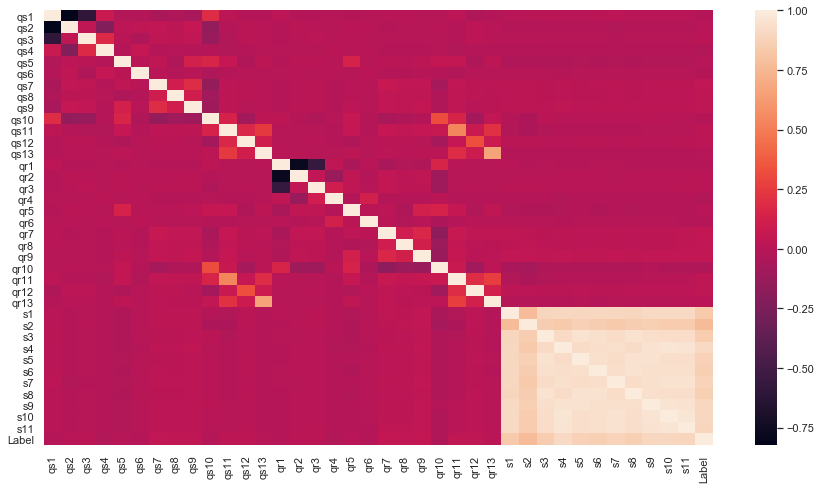

In [27]:
sns.heatmap(train_without_outliers.corr())

In [28]:
## A faire, analyse des outliers

In [29]:

print(ytrain[train_data.qr1 >train_data.qs9.max()].index)



SyntaxError: invalid syntax (<ipython-input-29-4aa0e7f48626>, line 2)

In [ ]:
print(xtest[xtest.qr1>1].index)
xtest[xtest.qr9> xtrain.qs9.max()].index


In [ ]:
# Check QR Values of xtest
test_outliers = xtest[xtest.qr9> xtrain.qs9.max()]
test_outliers[['qr11','qr12','qr13']].sort_values(by='qr11')

In [ ]:
train_outliers[['qr11','qr12','qr13']].sort_values(by='qr11').head(68)

In [ ]:
train_outliers[cols_qs]

In [ ]:
train_outliers[cols_qr]

In [ ]:
columns_logs = [0,1,2,11,12]
for c in columns_logs:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    xtrain_clean[xtrain.columns[c]].plot(kind='hist', bins=30, logy=True, ax=ax1)
    ax1.set_title(xtrain.columns[c])
    xtrain_clean[xtrain.columns[c+13]].plot(kind='hist', bins=30, logy=True, ax=ax2)
    ax2.set_title(xtrain.columns[c])
    (xtrain_clean[xtrain.columns[c]]-xtrain_clean[xtrain.columns[c+13]]).plot(kind='hist', bins=30, logy=True, ax=ax3)
    ax2.set_title("Deltas")
    plt.show()

In [ ]:
train_data.describe()

# Calcul de distance entre vecteurs

In [14]:
ytrain = ytrain[train_data.qr1 <=train_data.qs1.max()]
train_data = normalize_train_data
test_data = normalize_test_data

## Mahalanobis matrix


In [15]:
from metric_learn import MMC


X_train, X_test, y_train, y_test = train_test_split(train_data, ytrain, test_size=0.5) # 50 % c'est assez. Algorithme en n²

# tuples are the QS and QR columns
tuples = np.reshape(train_data[train_data.columns[:26]].values, [-1,2,13])

print(tuples.shape)

y_tuples = ytrain*2-1

mmc = MMC(random_state=42, verbose=True, convergence_threshold=0.0001,)
mmc.fit(tuples, y_tuples)

(9800645, 2, 13)


e:\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Continuum\anaconda3\envs\tensorflow\lib\site-packages\metric_learn\mmc.py:53: ChangedBehaviorWarning: Warning, no init was set (`init=None`). As of version 0.5.0, the default init will now be set to 'identity', instead of the identity divided by a scaling factor of 10. If you still want to use the same init as in previous versions, set init=np.eye(d)/10, where d is the dimension of your input space (d=pairs.shape[1]). This warning will disappear in v0.6.0, and `init` parameter's default value will be set to 'auto'.
  warnings.warn(msg, ChangedBehaviorWarning)


mmc iter: 0, conv = 0.100374, projections = 301
mmc iter: 1, conv = 0.106393, projections = 50
mmc iter: 2, conv = 0.112854, projections = 27
mmc iter: 3, conv = 0.119753, projections = 65
mmc iter: 4, conv = 0.126822, projections = 30
mmc iter: 5, conv = 0.134094, projections = 35
mmc iter: 6, conv = 0.141877, projections = 31
mmc iter: 7, conv = 0.149752, projections = 34
mmc iter: 8, conv = 0.158268, projections = 33
mmc iter: 9, conv = 0.166867, projections = 33
mmc iter: 10, conv = 0.176188, projections = 34
mmc iter: 11, conv = 0.185602, projections = 31
mmc iter: 12, conv = 0.195879, projections = 35
mmc iter: 13, conv = 0.206219, projections = 29
mmc iter: 14, conv = 0.103109, projections = 35
mmc iter: 15, conv = 0.108523, projections = 29
mmc iter: 16, conv = 0.054261, projections = 21
mmc iter: 17, conv = 0.057015, projections = 17
mmc iter: 18, conv = 0.059905, projections = 21
mmc iter: 19, conv = 0.062964, projections = 18
mmc iter: 20, conv = 0.066171, projections = 22
m

e:\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MMC(A0='deprecated', convergence_threshold=0.0001, diagonal=False,
    diagonal_c=1.0, init=None, max_iter=100, max_proj=10000, preprocessor=None,
    random_state=42, verbose=True)

In [16]:
def distance_mahalanobis(d1,d2,cov):
    e = d2-d1
    p = cov
    D = np.sqrt(np.sum(np.dot(e,p) * e, axis = 1))
    return D


def distance_canberra_mat(d1, d2):
    ### Don't seems to work in scipy    
    divide = abs(d1) + abs(d2)    
    distance = np.sum(np.divide(abs(d1-d2), divide, where=divide!=0), axis=1)    
    return distance
    
def distance_cosine_mat(d1, d2):
    ### Don't seems to work in scipy
    val = np.sum(d1*d2, axis=1)
    divide = np.sqrt(np.sum((d1*d1), axis=1))*np.sqrt(np.sum((d2*d2), axis=1))
    return 1 - np.divide(val, divide)

def distance_khi2_mat_w(d1, d2, w):
    divide = (d1 + d2)*w    
    distance = np.sum(np.divide((d1-d2)**2, divide, where=divide!=0), axis=1)   
    return distance

def distance_khi2_mat(d1, d2):
    divide = d1 + d2    
    distance = np.sum(np.divide((d1-d2)**2, divide, where=divide!=0), axis=1)   
    return distance


def distance_braycurtis_mat(d1, d2):
    divide = np.sum(abs(d1 + d2), axis=1)
    distance = np.divide(np.sum(abs(d1-d2), axis=1), divide)   
    return distance


def distance_eucl_mat(d1, d2):
    distance = np.sqrt(np.sum((d1-d2)**2, axis=1))   
    return distance

In [17]:
inv_cov = np.linalg.inv(cov)
inv_cov_3_11 = np.linalg.inv(cov_3_11)
cols_qs_3_11 = list(train_data.columns)[3:11]
cols_qr_3_11 = list(train_data.columns)[16:24]

In [18]:
train_data["canberra"]=distance_canberra_mat(train_data[cols_qr].values, train_data[cols_qs].values)
train_data["cosine"]=distance_cosine_mat(train_data[cols_qr].values, train_data[cols_qs].values)
train_data["khi2"]=distance_khi2_mat(train_data[cols_qr].values,train_data[cols_qs].values)
train_data["braycurtis"]=distance_braycurtis_mat(train_data[cols_qr].values,train_data[cols_qs].values)
train_data["euclidian"]=distance_eucl_mat(train_data[cols_qr].values,train_data[cols_qs].values)
train_data["mahalanobis_stats"] = distance_mahalanobis(train_data[cols_qr].values, train_data[cols_qs].values, inv_cov)
train_data["mahalanobis"] = distance_mahalanobis(train_data[cols_qr].values, train_data[cols_qs].values, mmc.get_mahalanobis_matrix())

train_data["canberra_3_11"]=distance_canberra_mat(train_data[cols_qr_3_11].values, train_data[cols_qs_3_11].values)
train_data["cosine_3_11"]=distance_cosine_mat(train_data[cols_qr_3_11].values, train_data[cols_qs_3_11].values)
train_data["khi2_3_11"]=distance_khi2_mat(train_data[cols_qr_3_11].values,train_data[cols_qs_3_11].values)
train_data["braycurtis_3_11"]=distance_braycurtis_mat(train_data[cols_qr_3_11].values,train_data[cols_qs_3_11].values)
train_data["euclidian_3_11"]=distance_eucl_mat(train_data[cols_qr_3_11].values,train_data[cols_qs_3_11].values)
train_data["mahalanobis_3_11_stats"] = distance_mahalanobis(train_data[cols_qr_3_11].values, train_data[cols_qs_3_11].values, inv_cov_3_11)


In [19]:
test_data["canberra"]=distance_canberra_mat(test_data[cols_qr].values, test_data[cols_qs].values)
test_data["cosine"]=distance_cosine_mat(test_data[cols_qr].values, test_data[cols_qs].values)
test_data["khi2"]=distance_khi2_mat(test_data[cols_qr].values,test_data[cols_qs].values)
test_data["braycurtis"]=distance_braycurtis_mat(test_data[cols_qr].values,test_data[cols_qs].values)
test_data["euclidian"]=distance_eucl_mat(test_data[cols_qr].values,test_data[cols_qs].values)
test_data["mahalanobis_stats"] = distance_mahalanobis(test_data[cols_qr].values, test_data[cols_qs].values, inv_cov)
test_data["mahalanobis"] = distance_mahalanobis(test_data[cols_qr].values, test_data[cols_qs].values, mmc.get_mahalanobis_matrix())

test_data["canberra_3_11"]=distance_canberra_mat(test_data[cols_qr_3_11].values, test_data[cols_qs_3_11].values)
test_data["cosine_3_11"]=distance_cosine_mat(test_data[cols_qr_3_11].values, test_data[cols_qs_3_11].values)
test_data["khi2_3_11"]=distance_khi2_mat(test_data[cols_qr_3_11].values,test_data[cols_qs_3_11].values)
test_data["braycurtis_3_11"]=distance_braycurtis_mat(test_data[cols_qr_3_11].values,test_data[cols_qs_3_11].values)
test_data["euclidian_3_11"]=distance_eucl_mat(test_data[cols_qr_3_11].values,test_data[cols_qs_3_11].values)
test_data["mahalanobis_3_11_stats"] = distance_mahalanobis(test_data[cols_qr_3_11].values, test_data[cols_qs_3_11].values, inv_cov_3_11)


On va calculer des distances entre les features Q1-13 et Q13-26

https://www.cs.toronto.edu/~ranzato/publications/taigman_cvpr14.pdf


In [20]:
# Calcul d'un SVM pour connaitre les coefficients des features

In [21]:
from sklearn import svm
clf = svm.LinearSVC()

d1 = train_data[cols_qs_3_11].values
d2 = train_data[cols_qr_3_11].values

divide = d1 + d2 
X = np.divide((d1-d2)**2, divide, where=divide!=0)

X_SVM, X_SVM_test, y_SVM, y_SVM_test = train_test_split(X, ytrain, test_size=0.90) # SVM on 10% of data

X_SVM.shape

(980064, 8)

In [22]:
clf.fit(X_SVM, y_SVM)

e:\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [23]:
w = clf.coef_

In [24]:
test_data["khi2_W_3_11"]=distance_khi2_mat_w(test_data[cols_qr_3_11].values,test_data[cols_qs_3_11].values, w)
train_data["khi2_W_3_11"]=distance_khi2_mat_w(train_data[cols_qr_3_11].values,train_data[cols_qs_3_11].values,w)

In [ ]:
qs_unique =len(train_data.QS.unique())

##### for c in list(xtrain_clean.columns):
    xtrain_clean[c].plot(kind='hist', bins=30, logy=True)   
    plt.title(c)
    plt.show()    
    xtrain_clean[c].plot(kind='hist', bins=30)
    plt.title(c)
    plt.show()

In [ ]:
len(xtrain_clean.QR.unique())

In [ ]:
ytrain_clean = ytrain[xtrain.qr1 <=1]
#qs_unique = len(xtrain_clean[ytrain_clean==1].QS.unique())


qs_unique




In [ ]:


choosen = sk.utils.random.sample_without_replacement(qs_unique,qs_unique//8)

# get the hash of the data
qs = xtrain_clean.QS.iloc[choosen].values

In [ ]:
indices = np.in1d(xtrain_clean.QS.values, qs)

In [ ]:
xtrain_clean.QS[indices].count()

In [27]:

X_train, X_test, y_train, y_test = train_test_split(train_data, ytrain, test_size=0.2)

#X_train= xtrain_clean[~indices]
#X_test=xtrain_clean[indices]
#y_train= ytrain_clean[~indices]
#y_test=ytrain_clean[indices]


In [ ]:
X_train.shape

In [ ]:
# Data augmentation
temp = X_train
for i in range(0,13):
    temp[list(train_data.columns)[i]] = X_train[list(train_data.columns)[i+13]]
    temp[list(train_data.columns)[i+13]] = X_train[list(train_data.columns)[i]]

temp["cosine"]=distance_cosine_mat(temp[cols_qr].values, temp[cols_qs].values)

X_train = pd.concat([X_train, temp], ignore_index=True)
y_train = pd.concat([y_train, y_train], ignore_index=True)

X_train.shape

In [25]:
cols_active = list(train_data.columns)[:]

remove_list=["QS","QR", "Label"]#, "qs1","qr1","qs2","qr2","qs3","qr3","qs13","qr13","qs12","qr12"]    
for i in remove_list: 
    try: 
        if i in cols_qr:
            cols_qr.remove(i) 
        if i in cols_qs:
            cols_qs.remove(i)
        if i in cols_active:
            cols_active.remove(i)
    except ValueError: 
        pass
cols_active

['qr1',
 'qr2',
 'qr3',
 'qr4',
 'qr5',
 'qr6',
 'qr7',
 'qr8',
 'qr9',
 'qr10',
 'qr11',
 'qr12',
 'qr13',
 'qs1',
 'qs2',
 'qs3',
 'qs4',
 'qs5',
 'qs6',
 'qs7',
 'qs8',
 'qs9',
 'qs10',
 'qs11',
 'qs12',
 'qs13',
 's1',
 's2',
 's3',
 's4',
 's5',
 's6',
 's7',
 's8',
 's9',
 's10',
 's11',
 'canberra',
 'cosine',
 'khi2',
 'braycurtis',
 'euclidian',
 'mahalanobis_stats',
 'mahalanobis',
 'canberra_3_11',
 'cosine_3_11',
 'khi2_3_11',
 'braycurtis_3_11',
 'euclidian_3_11',
 'mahalanobis_3_11_stats',
 'khi2_W_3_11']

## Tensorflow

In [32]:
# compute class weights

#one_weight = np.sum(train_data.Label==0)/(np.sum(train_data.Label==0))


import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow.keras.backend as K

#physical_devices = tf.config.experimental.list_physical_devices('GPU') 
#print("Num GPUs:", len(physical_devices)) 

class EvaluateEndEpoch(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None): 
        if epoch%5==0:
            yvalid = self.model.predict(X_test[cols_active].values,batch_size=1024)[:,0]
            s = score(y_test.values ,yvalid)
            self.model.save('model-512-512-512-1-couches-'+str(epoch)+"-"+format(s,".4f")+".h5")
        else:
            self.model.save('model-512-512-512-1-couches-'+str(epoch)+"-xxx.h5")



#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5')
        
model = tf.keras.models.Sequential([  
    tf.keras.layers.Dense(512,activation='relu'),    
    tf.keras.layers.Dense(512, activation='relu'),        
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.SensitivityAtSpecificity(1-10**-4),"binary_accuracy",tf.keras.metrics.AUC()])


model.fit(X_train[cols_active].values, y_train.values,
          #class_weight={0:1,1:one_weight},
          epochs=500, batch_size=1024,callbacks=[EvaluateEndEpoch()])


Train on 7840516 samples
Epoch 1/500
7840516/7840516 [==============================] - 241s 31us/sample - loss: 135.6214 - sensitivity_at_specificity_4: 0.0000e+00 - binary_accuracy: 0.9287 - auc_4: 0.6619
Epoch 2/500
7840516/7840516 [==============================] - 83s 11us/sample - loss: 0.5463 - sensitivity_at_specificity_4: 0.0000e+00 - binary_accuracy: 0.9399 - auc_4: 0.5891
Epoch 3/500
7840516/7840516 [==============================] - 80s 10us/sample - loss: 1.1930 - sensitivity_at_specificity_4: 0.0000e+00 - binary_accuracy: 0.9347 - auc_4: 0.5342
Epoch 4/500
7840516/7840516 [==============================] - 76s 10us/sample - loss: 0.8512 - sensitivity_at_specificity_4: 0.0000e+00 - binary_accuracy: 0.9345 - auc_4: 0.5361
Epoch 5/500
7840516/7840516 [==============================] - 82s 10us/sample - loss: 1.0555 - sensitivity_at_specificity_4: 0.0000e+00 - binary_accuracy: 0.9345 - auc_4: 0.5336
Epoch 6/500
7840516/7840516 [==============================] - 90s 12us/sampl

KeyboardInterrupt: 

In [ ]:
model = tf.keras.models.load_model("model-22-0.9132.h5")

In [ ]:
class EvaluateEndEpoch(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):        
        yvalid = self.model.predict(X_test[cols_active].values,batch_size=4096)[:,0]
        s = score(y_test.values ,yvalid)
        self.model.save('model-continue-'+str(epoch)+"-"+format(s,".4f")+".h5")


In [ ]:

model.fit(X_train[cols_active].values, y_train.values,
          class_weight={0:1,1:one_weight},epochs=100, batch_size=8192,callbacks=[EvaluateEndEpoch()])


# XGBOOST

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.02, n_estimators=256 , tree_method='gpu_hist')
%time model.fit(X_train[cols_active], y_train)


# LightGBM
## Calcul de la différence

In [29]:
for i in range(len(cols_qr)):
    X_train["diff"+str(i)]= X_train[cols_qr[i]] - X_train[cols_qs[i]]
    X_test["diff"+str(i)]= X_test[cols_qr[i]] - X_test[cols_qs[i]]

NameError: name 'X_train' is not defined

In [22]:
cols_active = list(X_train.columns)

remove_list=["QS","QR", "Label"]#, "qs1","qr1","qs2","qr2","qs3","qr3","qs13","qr13","qs12","qr12"]    
for i in (remove_list): 
    try:
        if i in cols_active:
            cols_active.remove(i)
    except ValueError: 
        pass
cols_active

NameError: name 'X_train' is not defined

In [44]:

import lightgbm 
# making lgbm datasets for train and valid
d_train = lightgbm.Dataset(X_train[cols_active], y_train)
d_valid = lightgbm.Dataset(X_test[cols_active], y_test)
    
parameters_optim = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_error',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 150,
    'max_bin':1500,
    'feature_fraction': 1,
    #'bagging_fraction': 0.6,
    #'bagging_freq': 5,
    'learning_rate': 0.02,
    'lambda_l2':0.02,
    'lambda_l1':0.01,
    'verbose': 0
}

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_error',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 150,
    'max_bin':1550,
    'feature_fraction': 1,
    #'bagging_fraction': 0.6,
    #'bagging_freq': 5,
    'learning_rate': 0.017,
    'lambda_l2':0.02,    
    'verbose': 0
}

model = lightgbm.train(parameters,
                       d_train,
                       valid_sets=d_valid,
                       num_boost_round=1000000,
                       early_stopping_rounds=1000,
                       verbose_eval=50)   
    # making prediciton for one column


Training until validation scores don't improve for 1000 rounds
[50]	valid_0's binary_error: 0.00382679
[100]	valid_0's binary_error: 0.00281206
[150]	valid_0's binary_error: 0.00255748
[200]	valid_0's binary_error: 0.00241515
[250]	valid_0's binary_error: 0.00227281
[300]	valid_0's binary_error: 0.00216057
[350]	valid_0's binary_error: 0.00205803
[400]	valid_0's binary_error: 0.00197385
[450]	valid_0's binary_error: 0.00189732
[500]	valid_0's binary_error: 0.0018259
[550]	valid_0's binary_error: 0.00174988
[600]	valid_0's binary_error: 0.00169326
[650]	valid_0's binary_error: 0.00164734
[700]	valid_0's binary_error: 0.0016004
[750]	valid_0's binary_error: 0.00156061
[800]	valid_0's binary_error: 0.00152439
[850]	valid_0's binary_error: 0.00149378
[900]	valid_0's binary_error: 0.00146776
[950]	valid_0's binary_error: 0.0014346
[1000]	valid_0's binary_error: 0.00141674
[1050]	valid_0's binary_error: 0.00139072
[1100]	valid_0's binary_error: 0.00136522
[1150]	valid_0's binary_error: 0.001

KeyboardInterrupt: 

# Grid search for some parameters

In [ ]:
for i in range(len(cols_qr)):
    train_data["diff"+str(i)]= train_data[cols_qr[i]] - train_data[cols_qs[i]]

In [32]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.model_selection import cross_val_score
import lightgbm 

# making lgbm datasets for train and valid
#d_train = lightgbm.Dataset(X_train[cols_active], y_train)
#d_valid = lightgbm.Dataset(X_test[cols_active], y_test)
    
parameters_optim = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_error',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 150,
    'max_bin':1500,
    'feature_fraction': 1,
    #'bagging_fraction': 0.6,
    #'bagging_freq': 5,
    'learning_rate': 0.02,
    'lambda_l2':0.02,
    'lambda_l1':0.01,
    'verbose': 0
}

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_error',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 150,
    'max_bin':1800,    
    'learning_rate': 0.025,
    'lambda_l2':0.2,
    'lambda_l1':0.1,
    'verbose': 0
}

mdl = lightgbm.LGBMClassifier(
    application= 'binary',
    objective='binary',
    metric= ['binary_error','auc'],
    is_unbalance= 'false',
    boosting='gbdt',
    num_leaves= 150,
    max_bin=1800,    
    learning_rate=0.02,
    lambda_l2=0.2,
    lambda_l1=0.1,
    verbose= 0,
    bagging_fraction= 0.6,
    bagging_freq= 5,
    num_boost_round=5000,
    verbose_eval=50)


scores = cross_val_score(mdl, X_train[cols_active], y_train, cv=5,n_jobs=1, verbose=100, scoring='roc_auc')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  ................................................................


e:\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Continuum\anaconda3\envs\tensorflow\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


KeyboardInterrupt: 

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_error',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 250,
    'max_bin':1024,
    'feature_fraction': 1,
    'bagging_fraction': 0.3,
    'bagging_freq': 5,
    'learning_rate': 0.05,
    'verbose': 1
}

model = lightgbm.train(parameters,
                       d_train,
                       valid_sets=d_valid,
                       num_boost_round=5000,
                       early_stopping_rounds=300, init_model=model
                      ) 

In [35]:
model.save_model('lgbm_optim_l2_30.model')

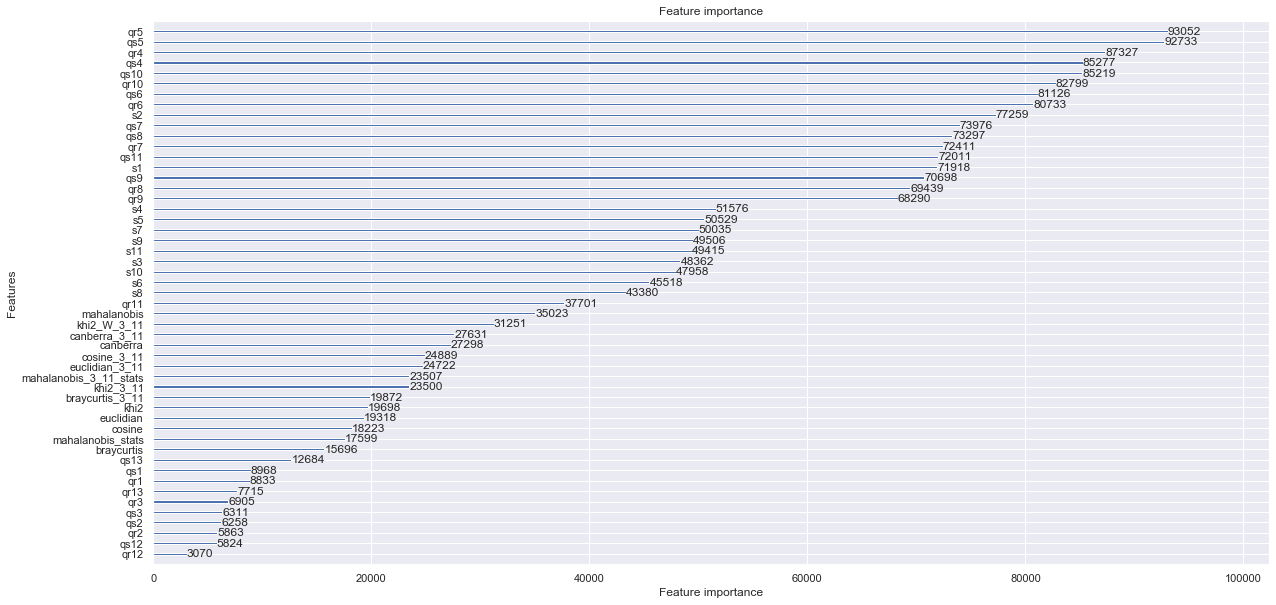

In [36]:

plt.rcParams['figure.figsize'] = [20, 10]
lightgbm.plot_importance(model)

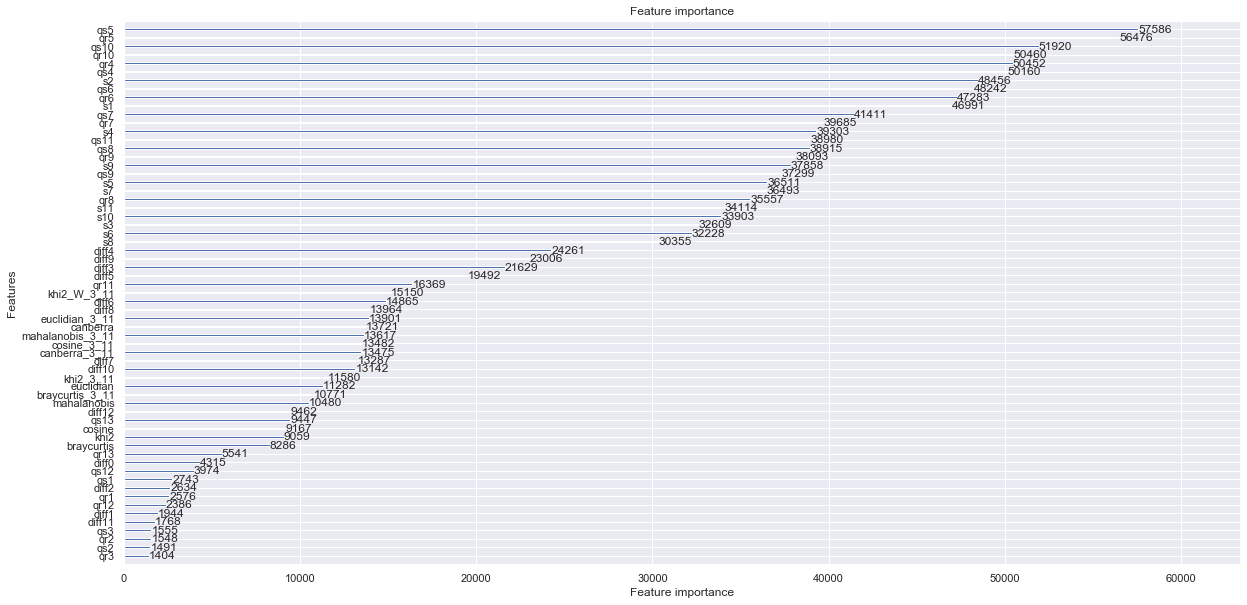

In [48]:

plt.rcParams['figure.figsize'] = [20, 10]
lightgbm.plot_importance(model)

In [37]:
#model.save_model('lgbm_distance.txt')

soft = model.predict(X_test[cols_active])

print('Fininshed Training')
soft

Fininshed Training


array([1.56007884e-05, 1.71998491e-08, 1.04793766e-08, ...,
       1.10998847e-04, 9.87788350e-08, 1.63578398e-07])

In [38]:

yvalid = soft

In [39]:
N = np.sum(y_test == 0).values
P = np.sum(y_test == 1).values



In [40]:

yvalid_scoreordered = y_test.values[np.argsort(yvalid)]


FP = 0.0
TP = 0.0
val = 0
print(N)
print(P)
for i in range(len(y_test) - 1, -1, -1):        
    if (yvalid_scoreordered[i] == 1):
        TP = TP + 1
    else:
        FP = FP + 1
        #print(X_test[cols].iloc(i))
    if (FP / N > 10**-4):
        FP = FP - 1
        break
print("For the smallest FPR <= 10^-4 (i.e., ", FP / N, ") TPR = ", TP / P, ".", sep = "")

[1825277]
[134852]
For the smallest FPR <= 10^-4 (i.e., [9.97108932e-05]) TPR = [0.98949218].


In [49]:
for i in range(len(cols_qr)):
    test_data["diff"+str(i)]= test_data[cols_qr[i]] - test_data[cols_qs[i]]

In [41]:

# Classify the provided test data
ytest = model.predict(test_data[cols_active].values)
print(ytest.shape)

# Deal with outliers
print(ytest[test_outliers_mask])


(3768311,)
[1.29138297e-06 2.46573750e-05 3.33016141e-06 2.10542786e-05
 6.17198254e-07 4.37644643e-06 8.08400660e-07 9.75392098e-07
 2.81811846e-05 5.34664095e-07 4.11651017e-06 3.64812853e-06
 5.75427120e-07 1.10061341e-05 4.55514791e-07 9.98811067e-06
 8.24168596e-06 1.14810083e-06 3.70654808e-07 1.45161949e-06
 2.80372927e-05 7.32223247e-05 1.05700604e-06]


In [42]:
ytest[test_outliers_mask] = 1

In [43]:


np.savetxt('ytest_normalize_l2_30_distance.csv', ytest, fmt = '%1.15f', delimiter=',')

# SVM on 20% of the data

In [ ]:
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(train_data, ytrain, test_size=0.8)

param_grid = [
  {'C': [1, 10, 100], 'gamma': ['scale','auto'], 'kernel': ['rbf']},
 ]


clf = svm.SVC(kernel="rbf")


search = GridSearchCV(clf, param_grid, cv=5, verbose=100, n_jobs=4)
search.fit(X_train[cols_active], y_train)





Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(50,), dtype=object).
Memmapping (shape=(1960129,), dtype=int64) to new file C:\Users\martinez\AppData\Local\Temp\joblib_memmapping_folder_10196_1487412489\10196-100033480-f549303906724ba79d28698a93b0060f.pkl
Memmapping (shape=(50, 1960129), dtype=float64) to new file C:\Users\martinez\AppData\Local\Temp\joblib_memmapping_folder_10196_1487412489\10196-100033480-0b51d080e5f04b6aa37cd82c1c35ed16.pkl
Pickling array (shape=(50,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Memmapping (shape=(1960129,), dtype=int64) to new file C:\Users\martinez\AppData\Local\Temp\joblib_memmapping_folder_10196_1487412489\10196-100033480-61bf88b63f2843bdb390e574cceb9566.pkl
Memmapping (shape=(1, 1960129), dtype=int64) to new file C:\Users\martinez\AppData\Local\Temp\joblib_memmapping_folder_10196_1487412489\10196-100033480-7c86e82297e640f3

exception calling callback for <Future at 0x5f664a8 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "e:\Continuum\anaconda3\envs\tensorflow\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "e:\Continuum\anaconda3\envs\tensorflow\lib\site-packages\joblib\parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "e:\Continuum\anaconda3\envs\tensorflow\lib\site-packages\joblib\parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "e:\Continuum\anaconda3\envs\tensorflow\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "e:\Continuum\anaconda3\envs\tensorflow\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "e:\Continuum\anaconda3\envs\tensorflow\lib\site-packages\joblib\_parallel_backends.py",

[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed: 1219.0min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 1219.0min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed: 1219.0min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed: 1219.0min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed: 1219.0min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed: 1219.0min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 1219.0min
